We will be doing this Project in Four basic steps:-
1. Screen Capturing to take the inputs
2.Generation of dataset from above step and then loading of the dataset
3.Fitting of the Model using Support Vector Classifier(SVC) and calculate the metric parameters
4.Prediction of images by using Paint as the input .

In [1]:
# We are importing this package called pyscreenshot to take the input by using paint 

import pyscreenshot as ImageGrab
import time
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import csv
import glob
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import joblib


We have created a folder name Input_images which has 10 folders each having a name representing the digits
For example we have 0 named folder for storing images of 0 .

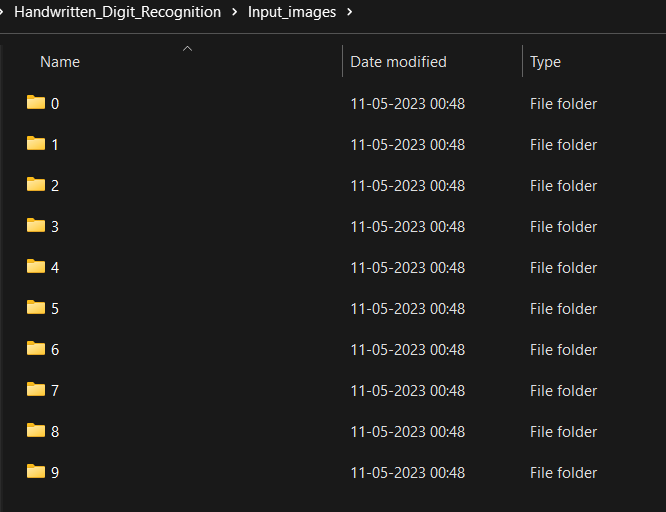


# Caution:- 
So for the Dimentions of screencapture i am using left half of the screen with a paint  
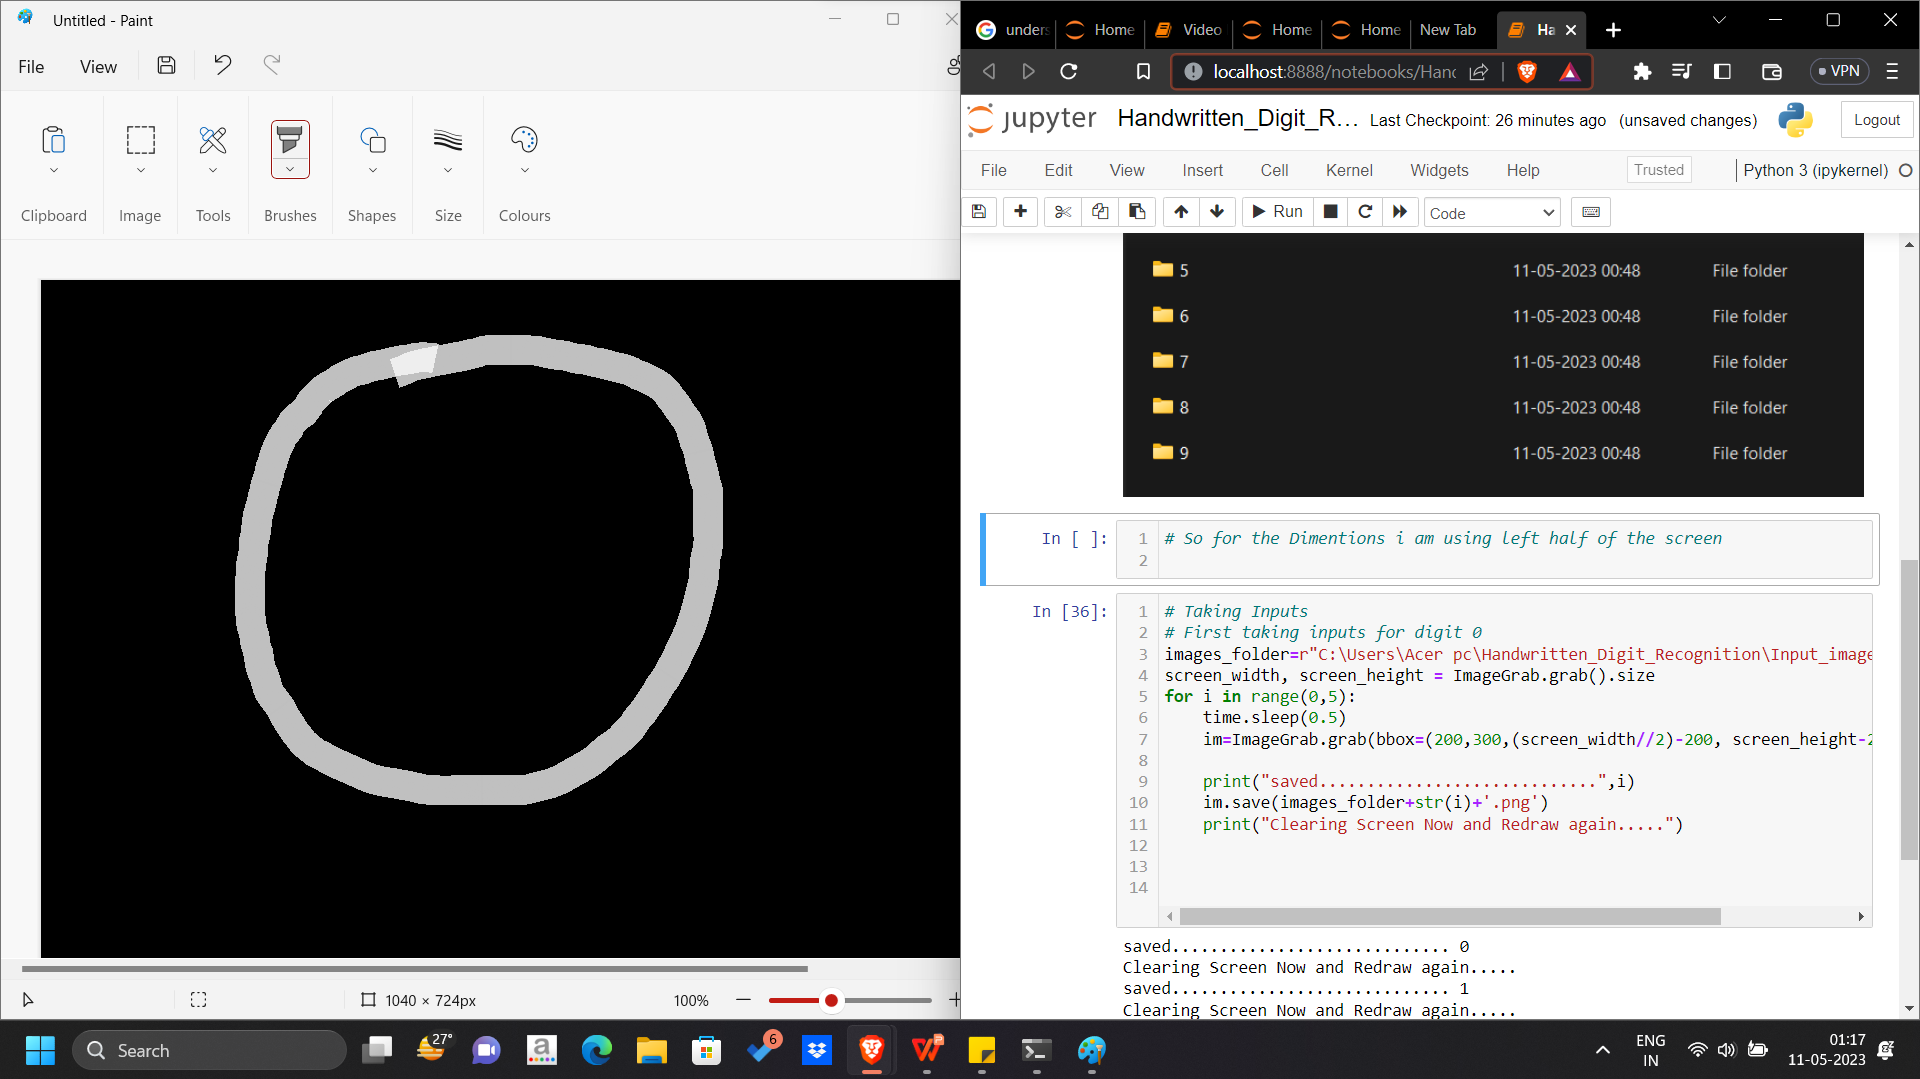



This is how the images of digit 0 turned out :-

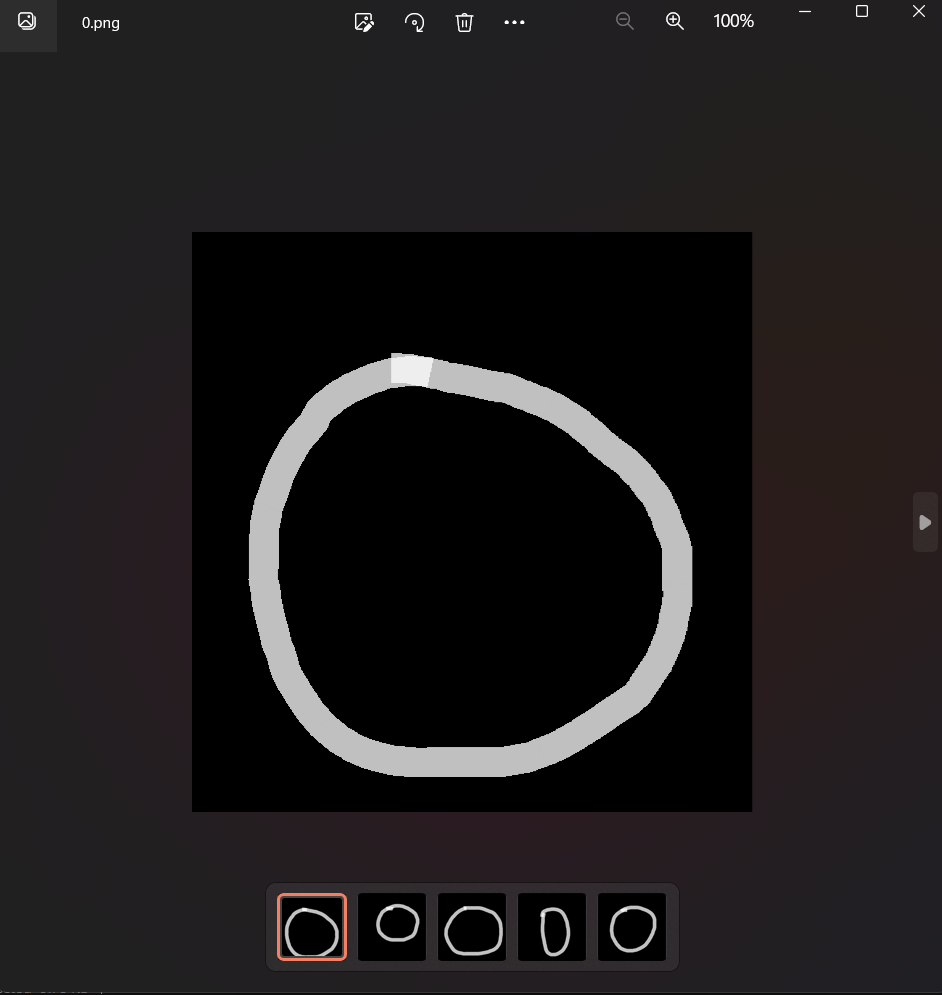

This is how digit 1 turned out :-
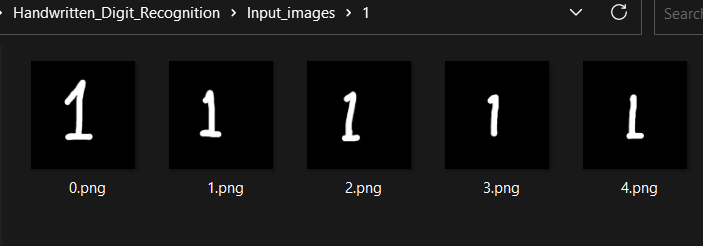    

 This is how the digits look like from 2 to 9:-
 
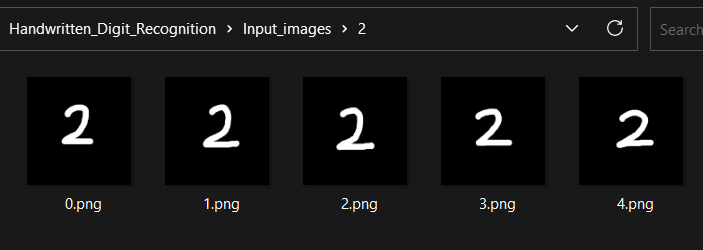


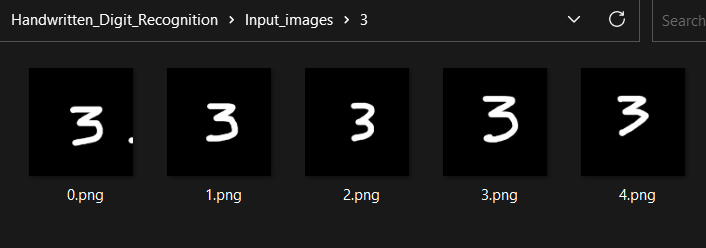

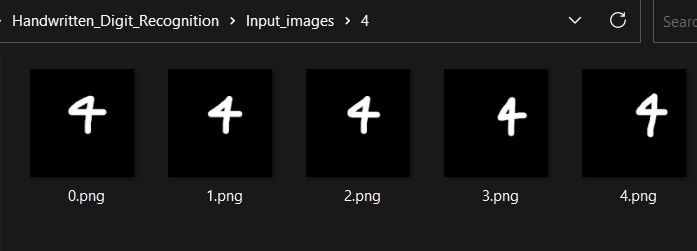

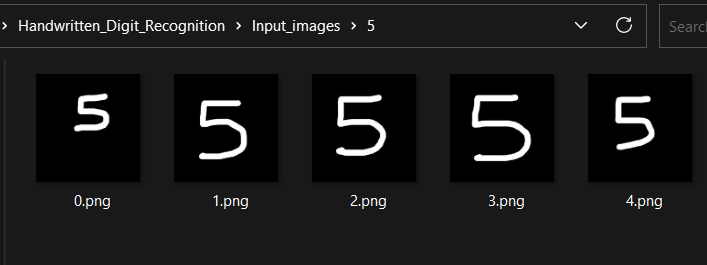

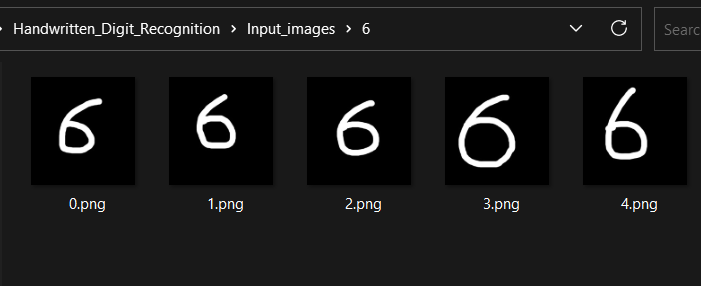

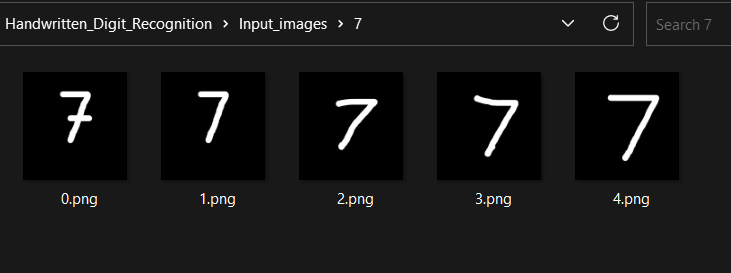

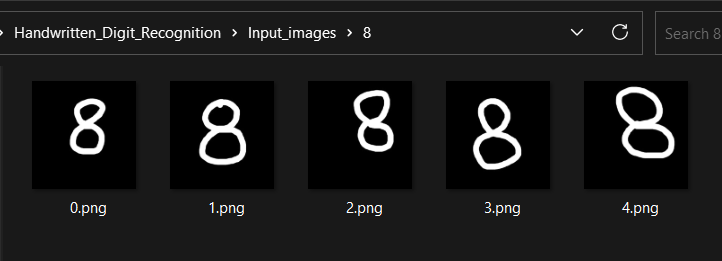

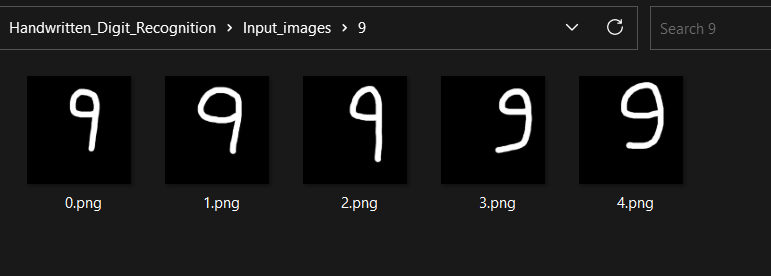

# Data Augmentation - 
## Data augmentation is a technique commonly used in machine learning and computer vision to increase the diversity and variability of the training data. It involves applying various transformations or modifications to the original images to create new, slightly altered versions of the data.

Here is the folder that is created by data augmentation of digit 0
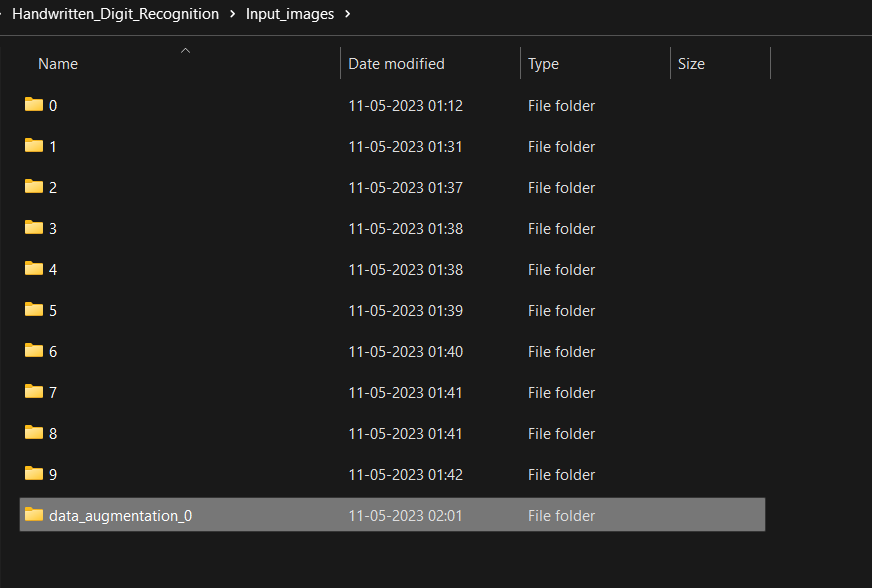

There are around 500 images for 0 now as becuase of 1 image 100 images are generated so now 5*100=500 images now :-
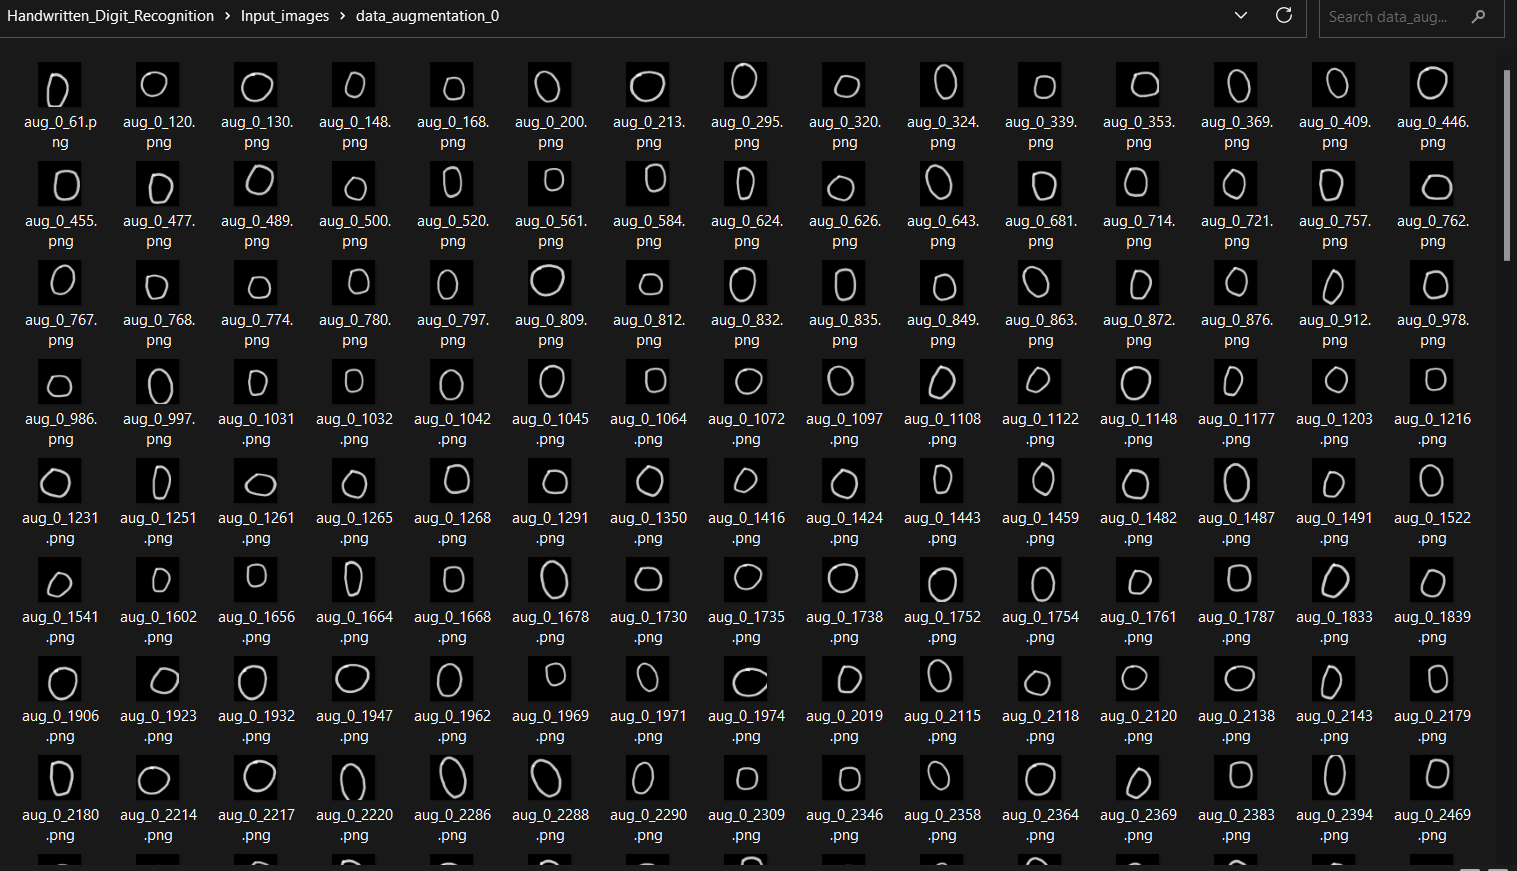

### Now i am applying for loop from 1 to 9 digit for data Augmentation

This is how the Data augmentation folders looks like of digits from 1 to 9
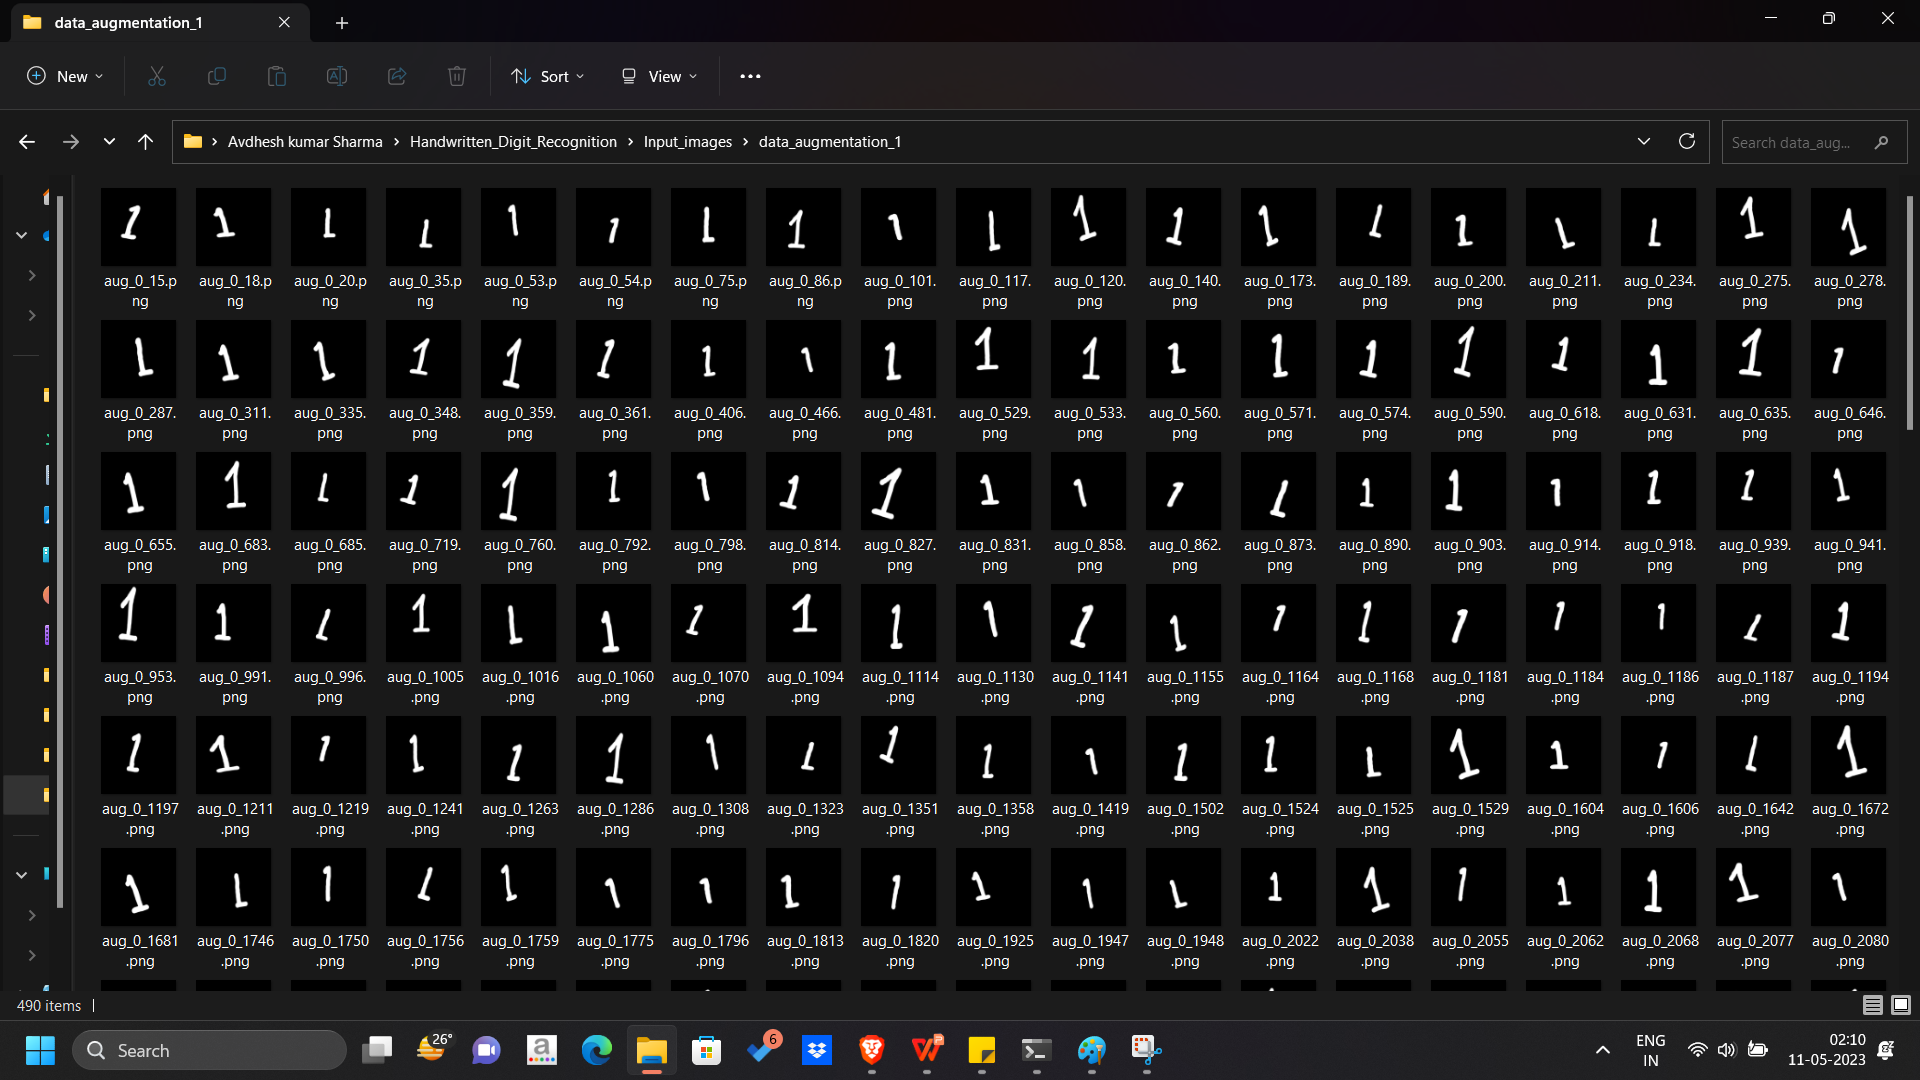

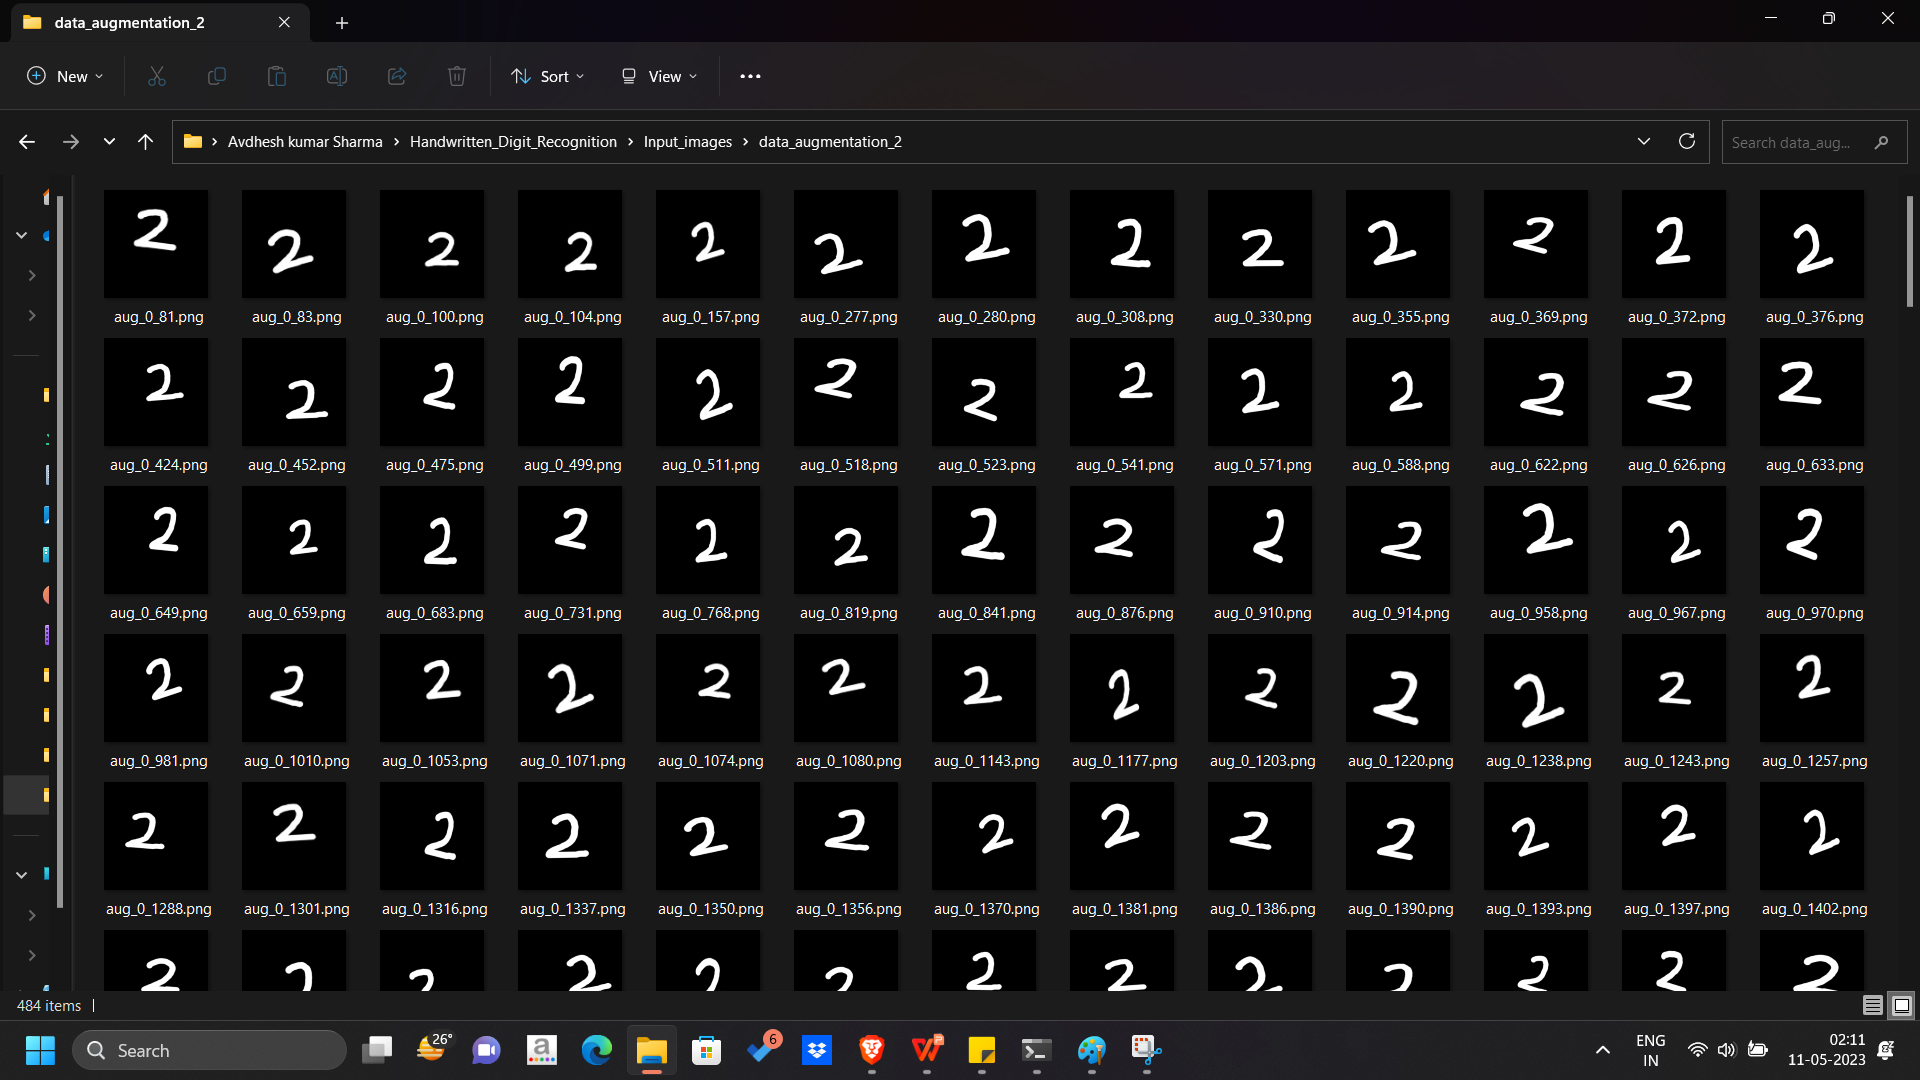

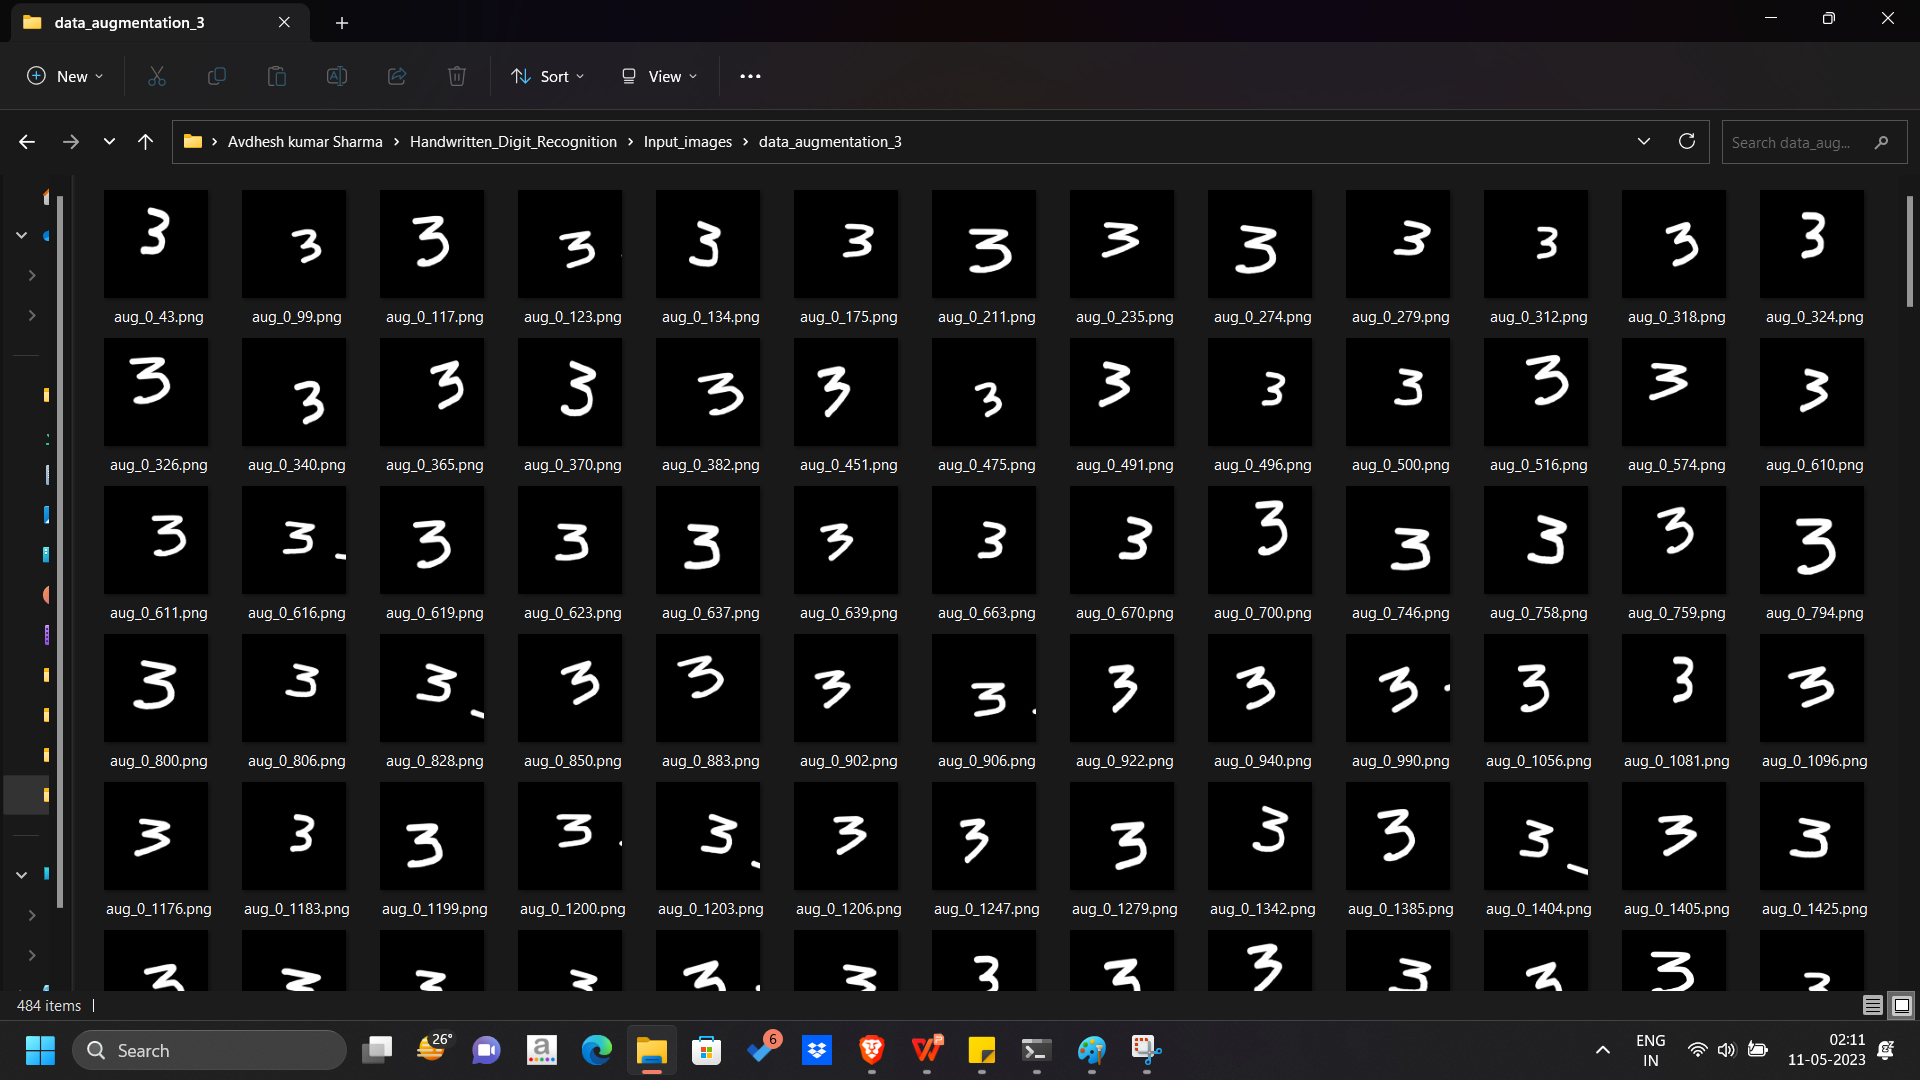

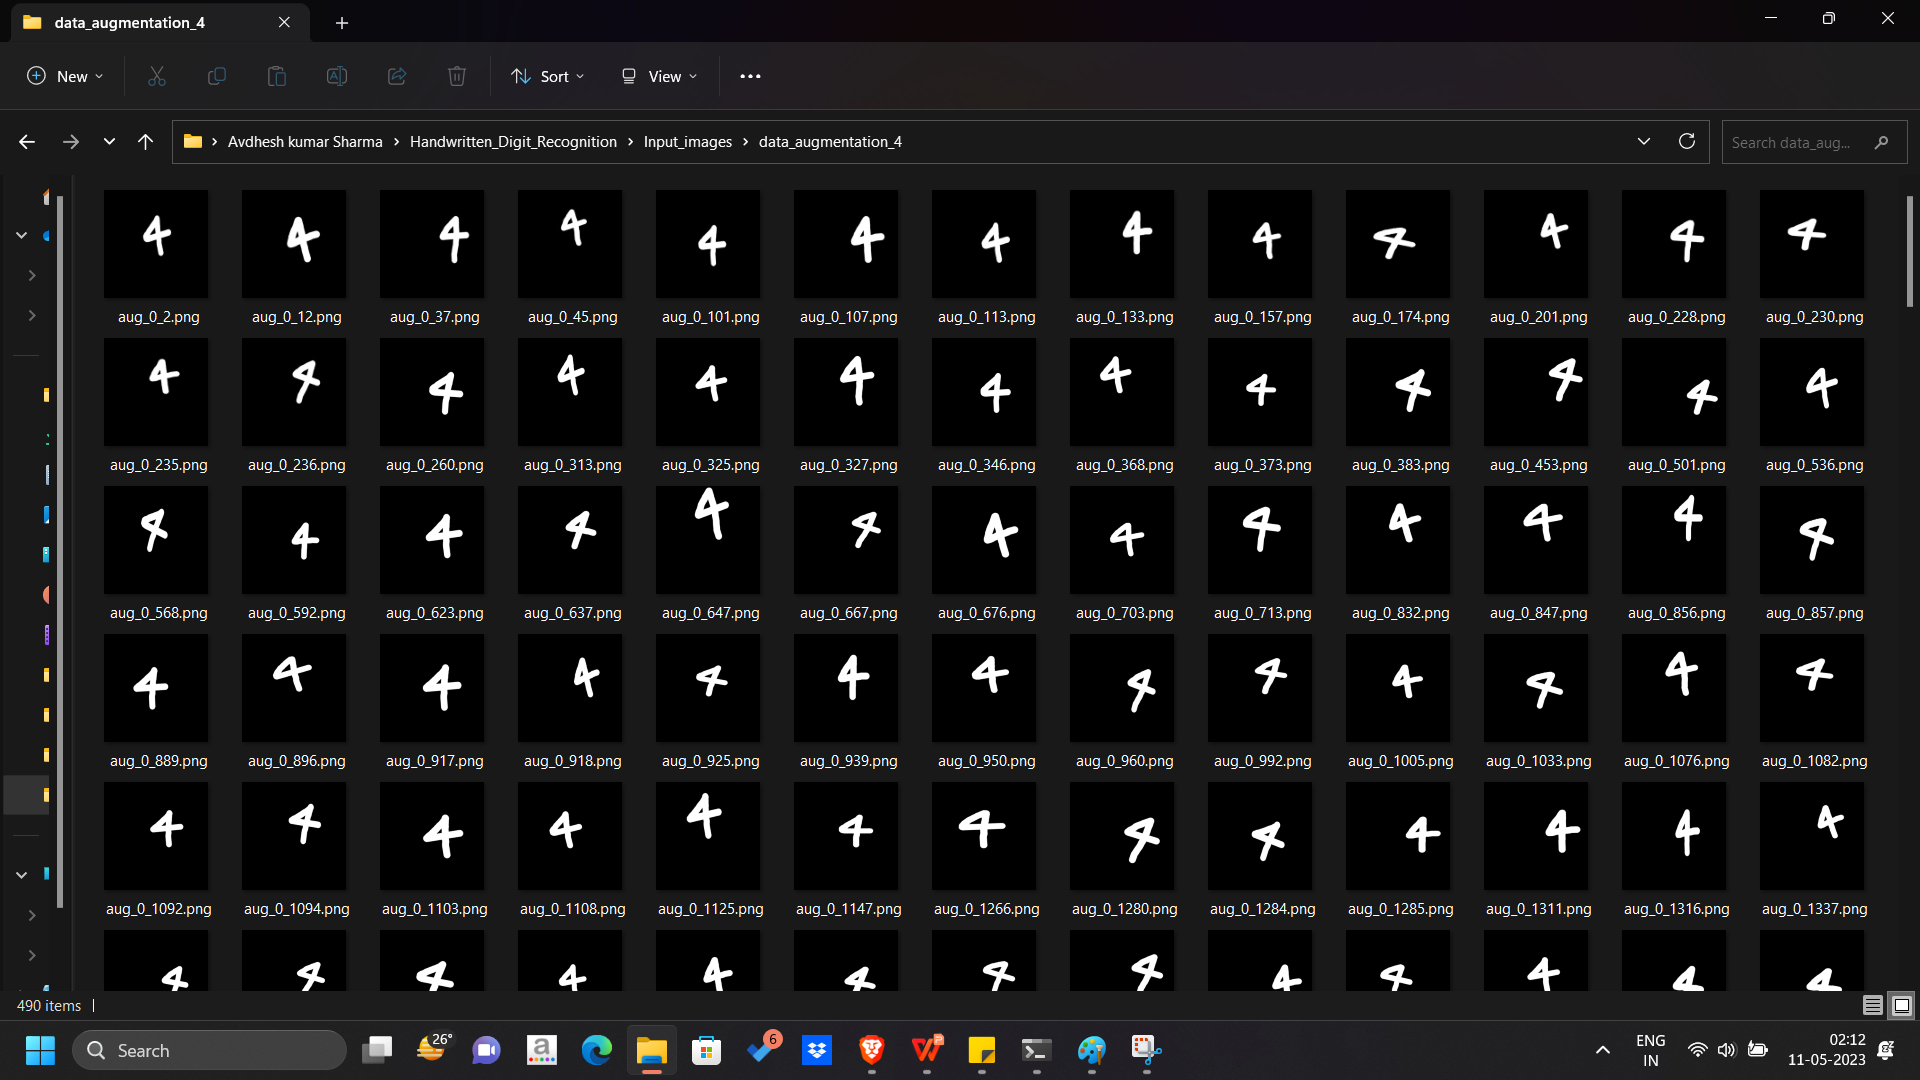

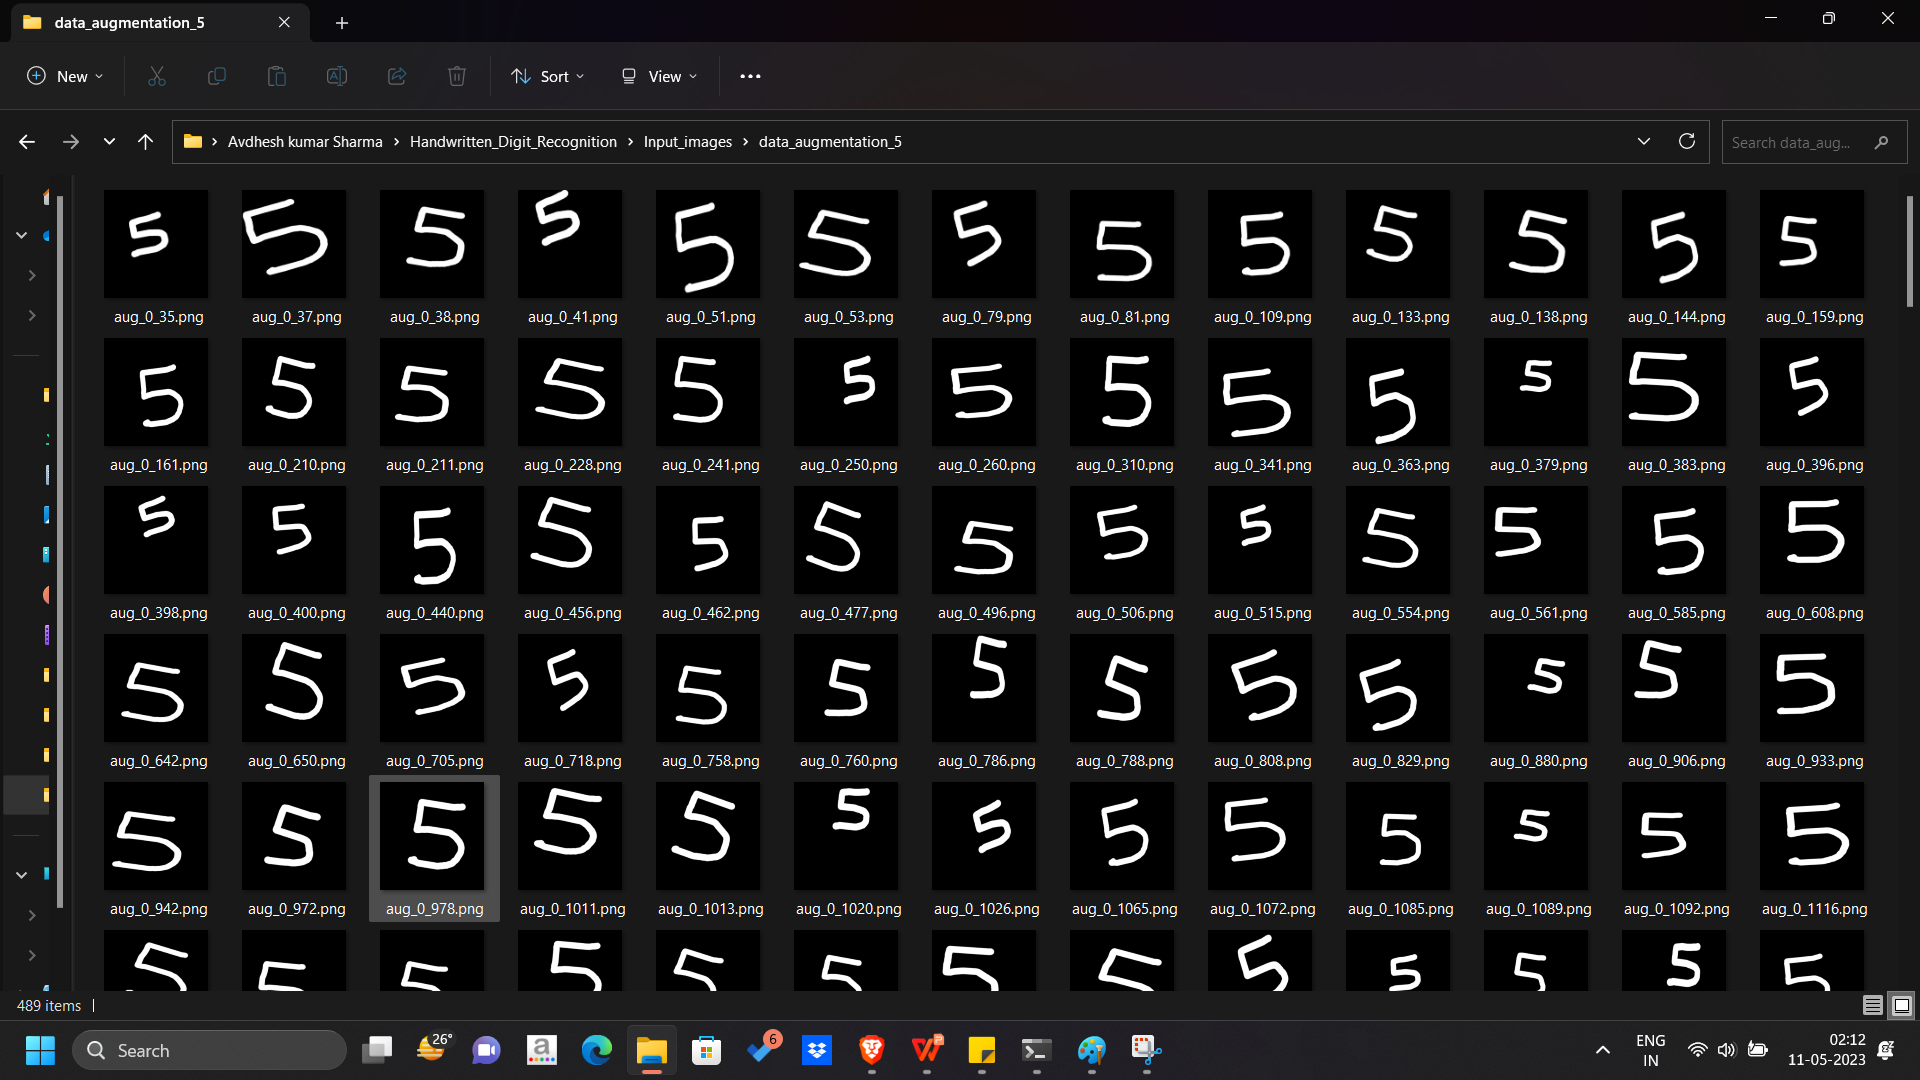

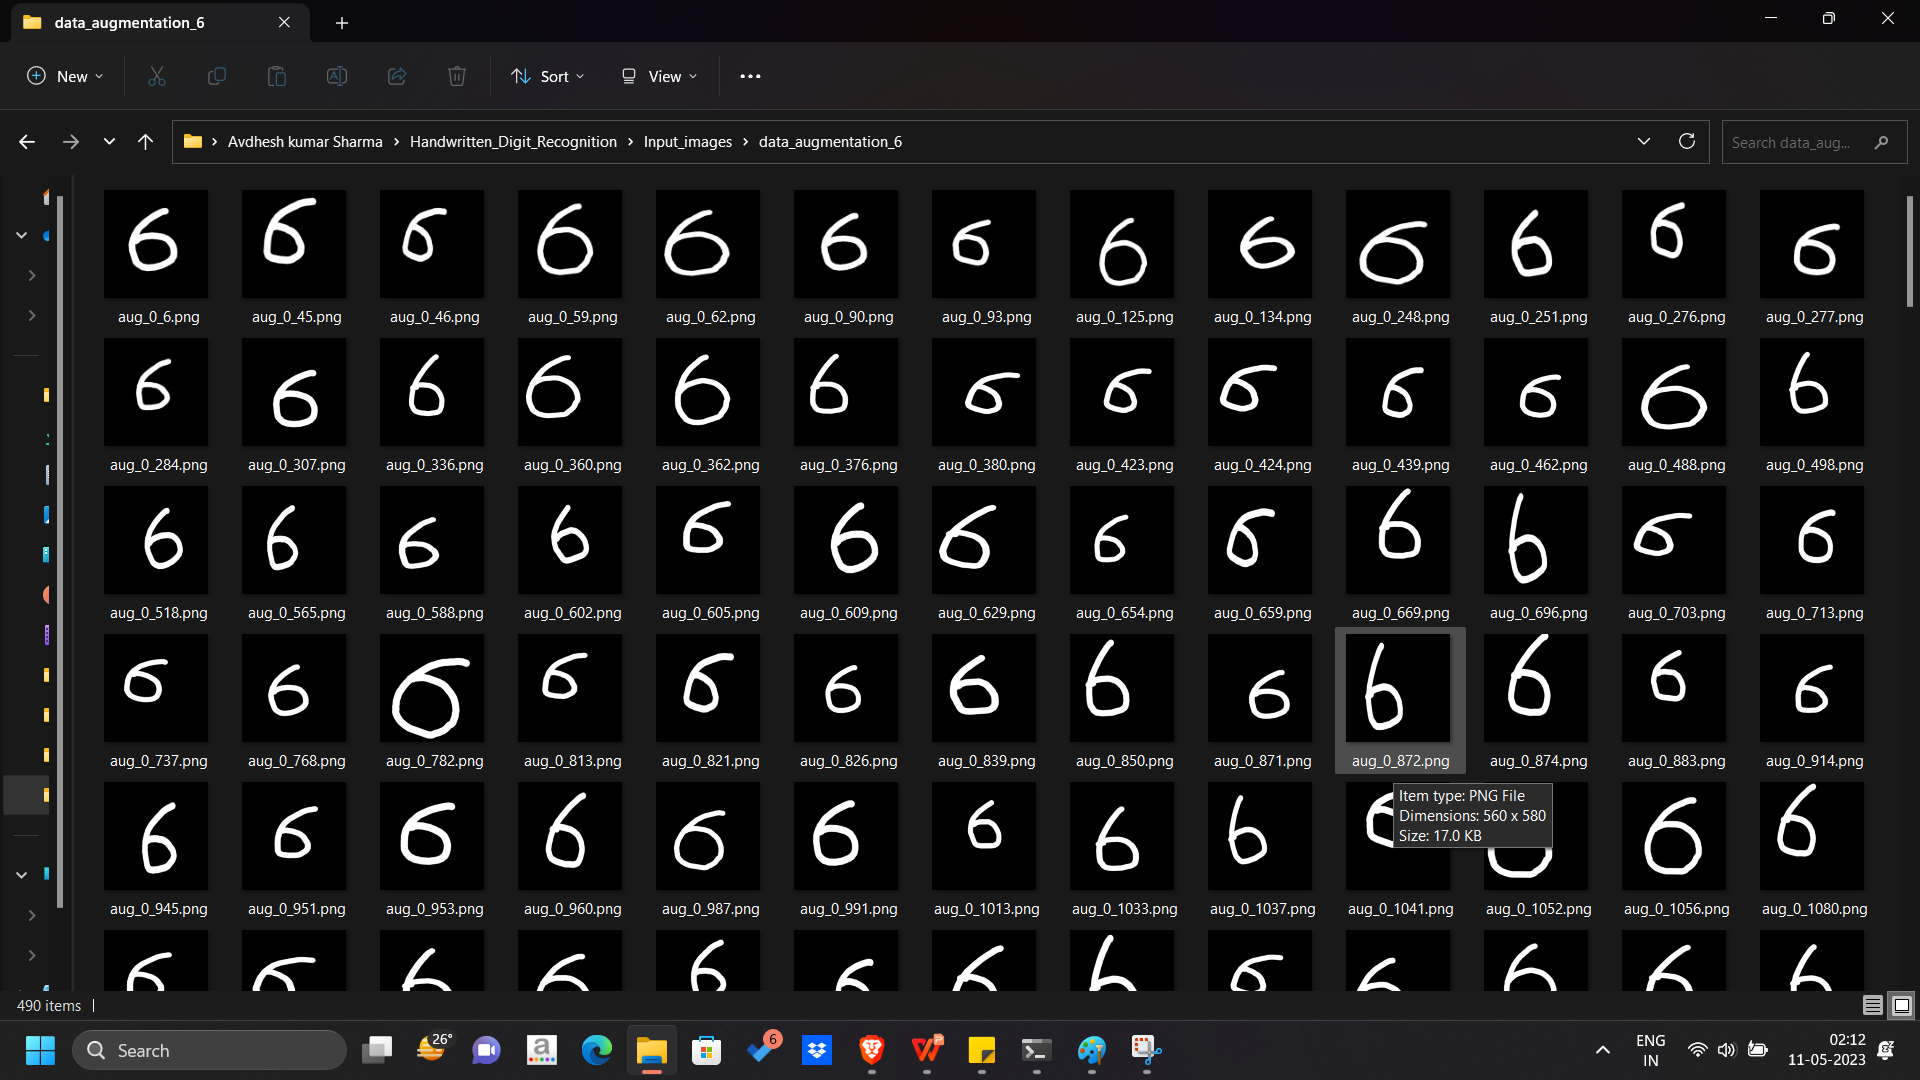

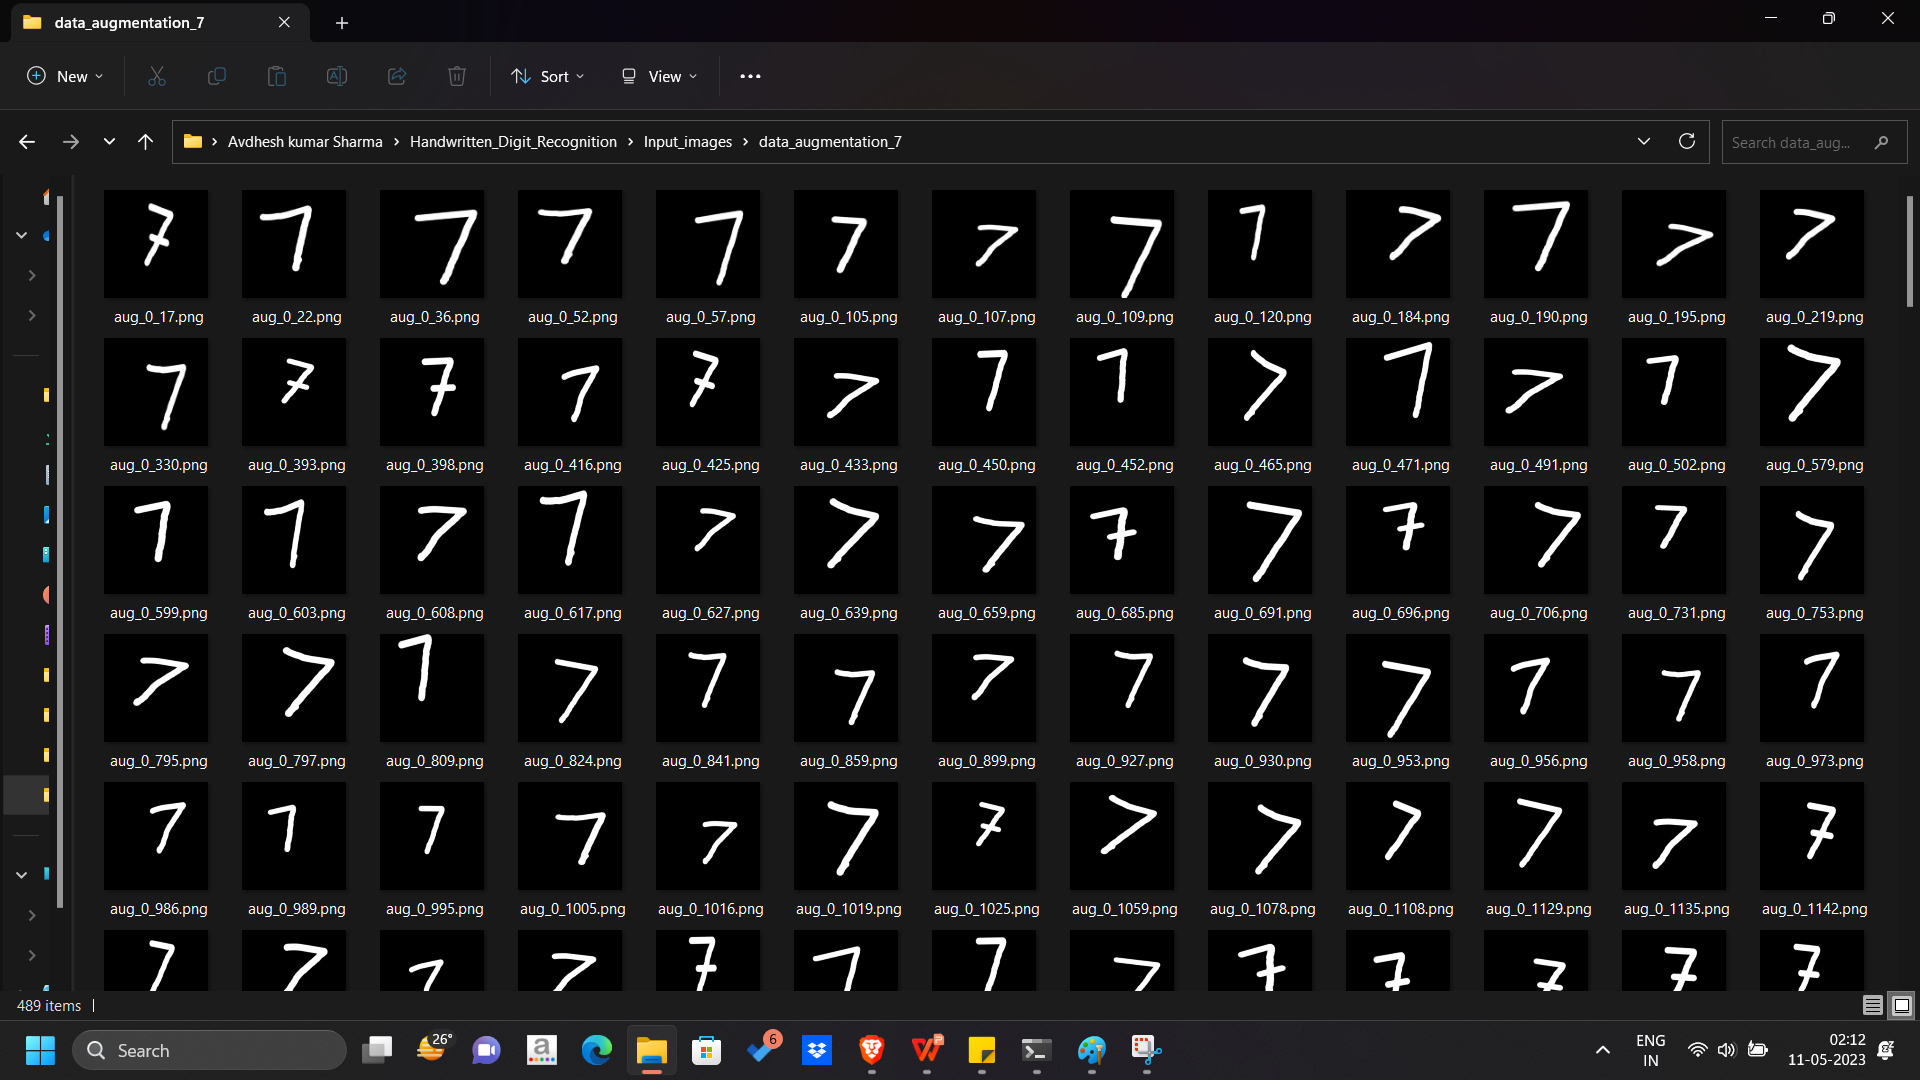

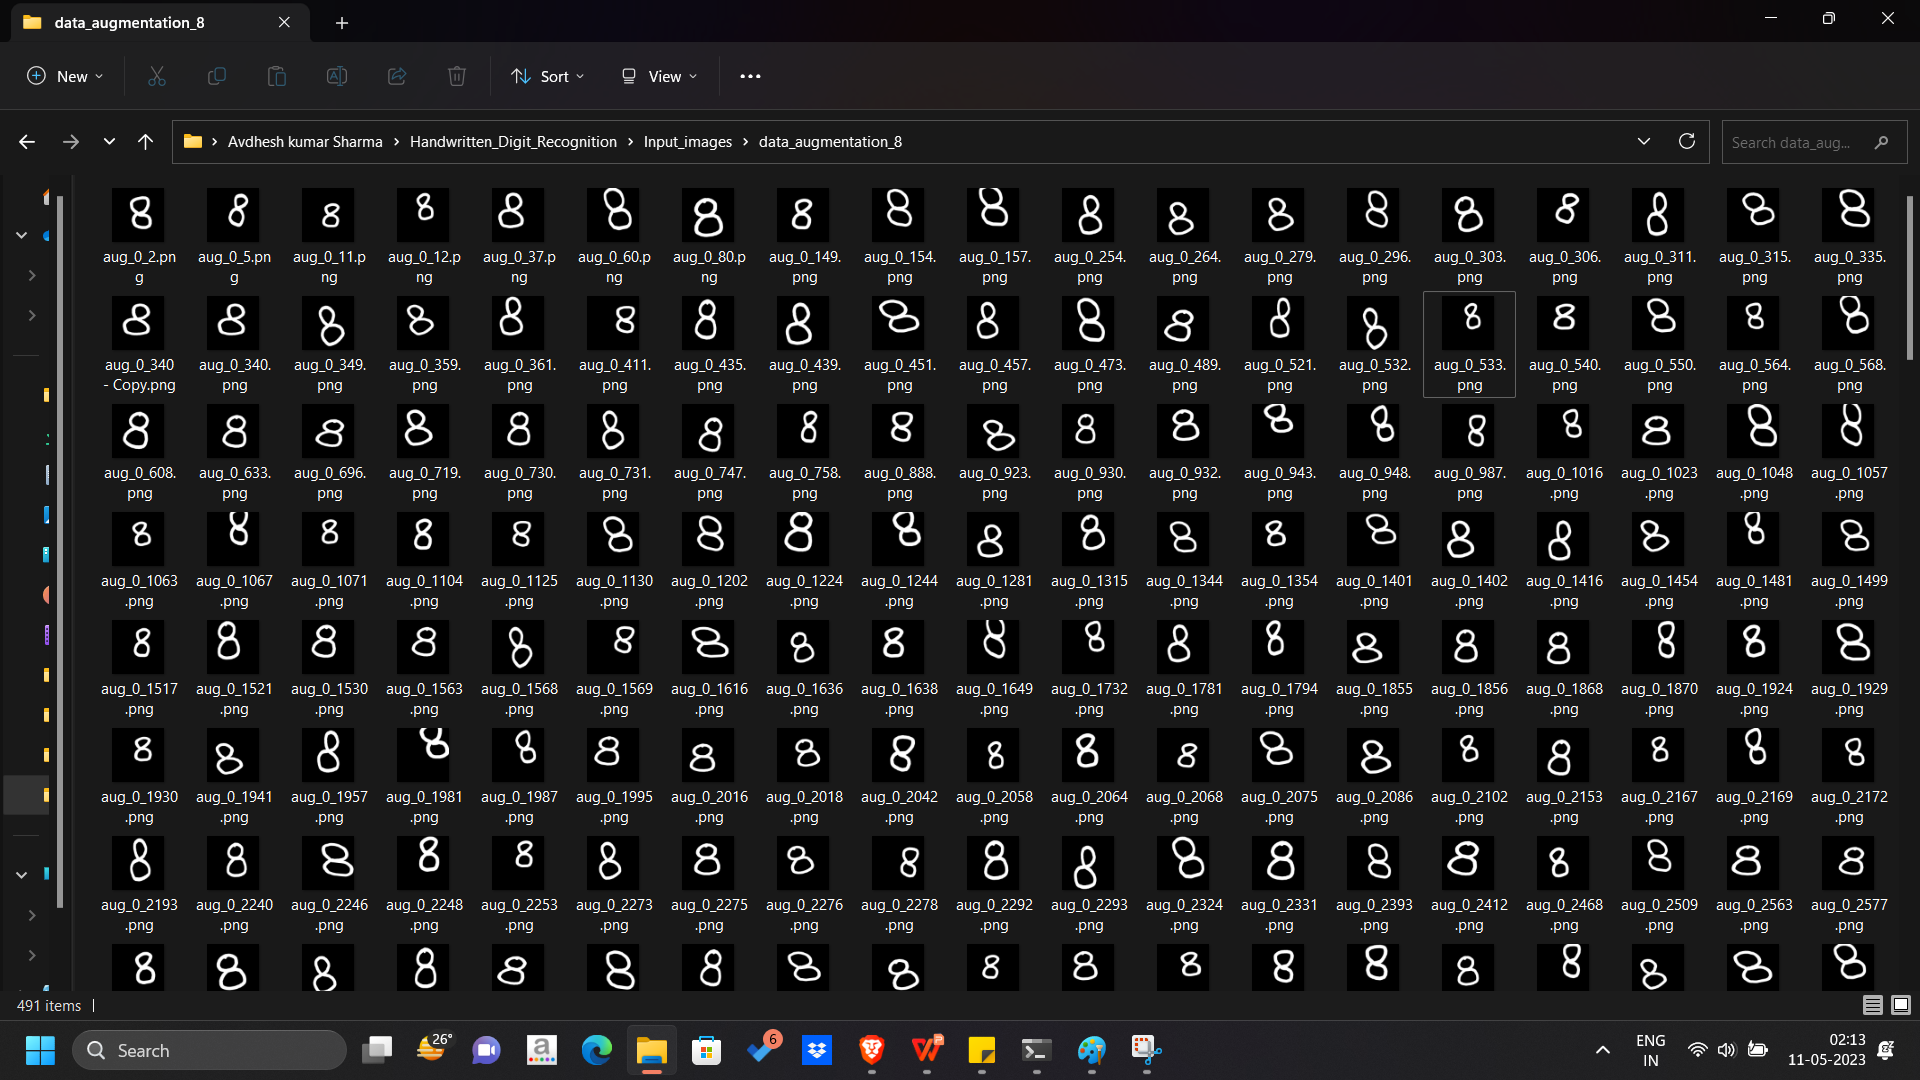

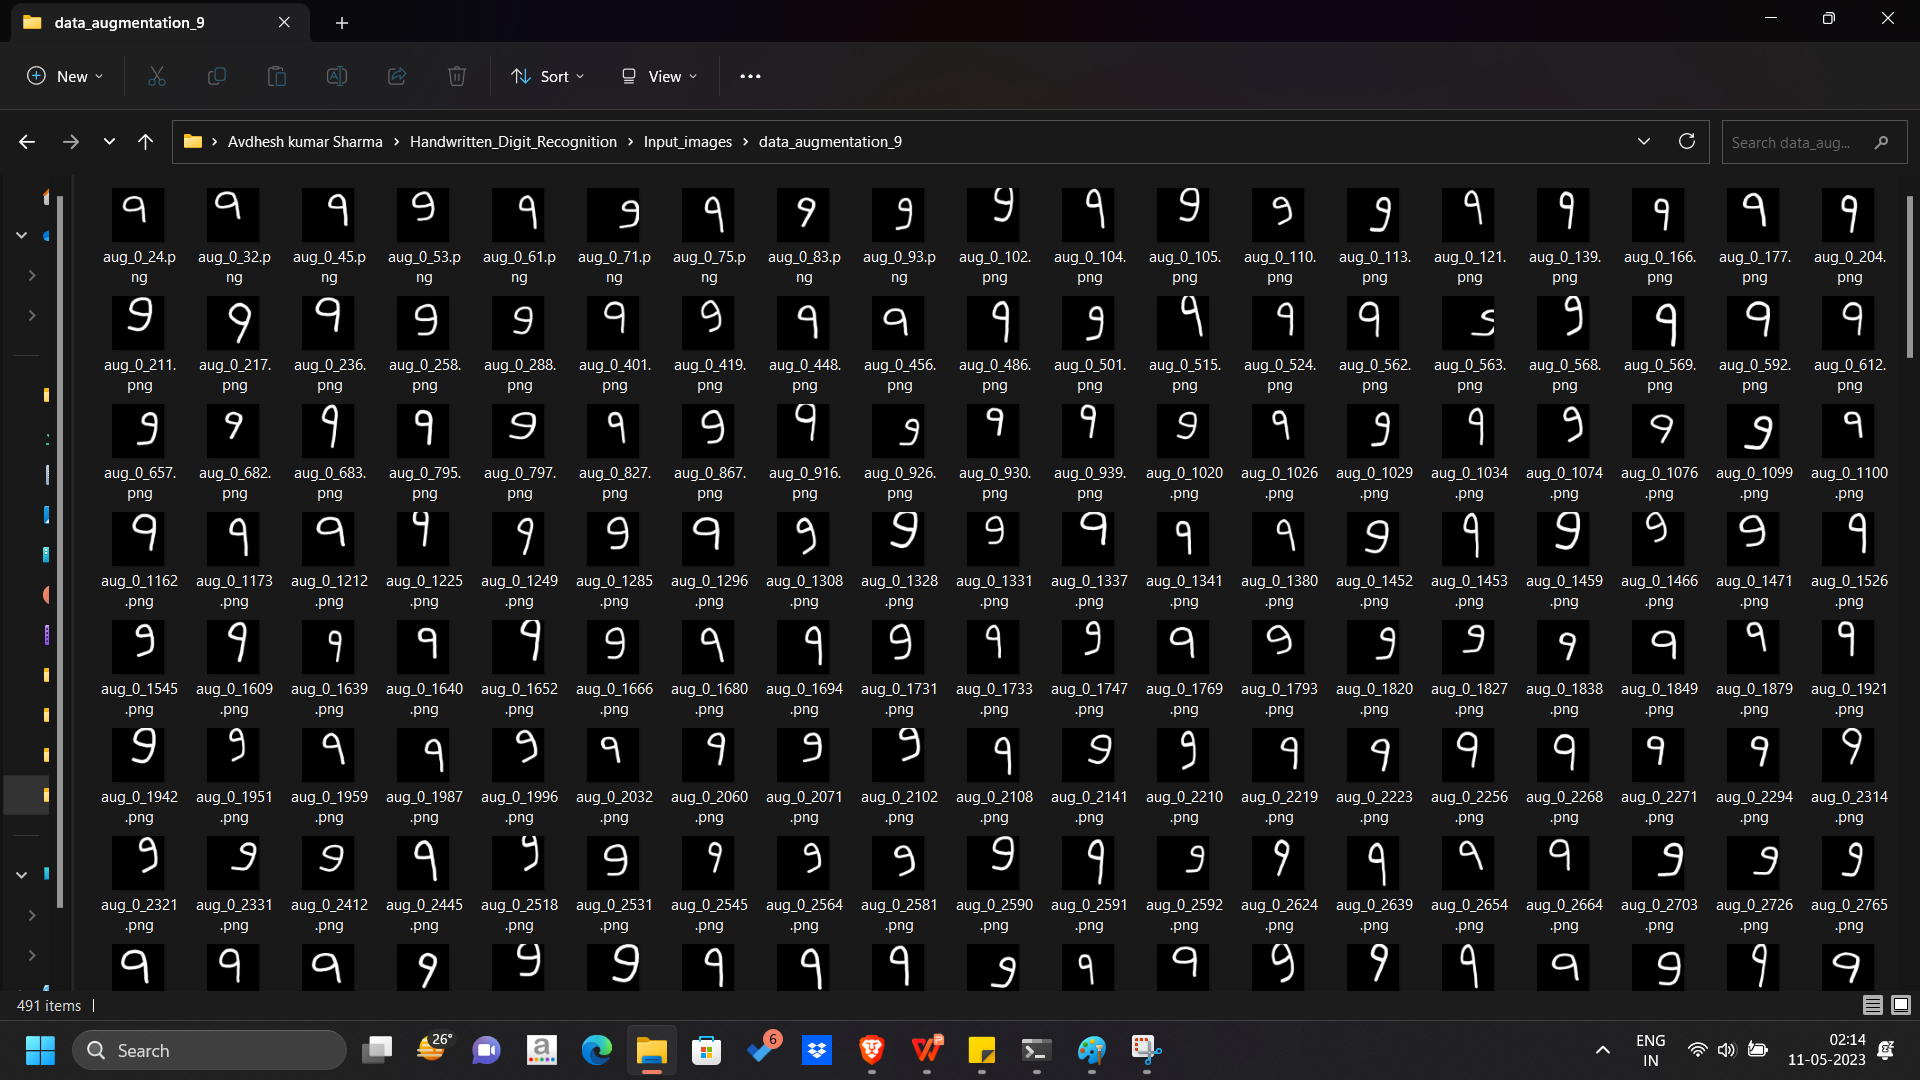

As now the total number of images we have are each folder conatains almost 500 images so 10*500+(5*10)=5000+50=5500 . this much amount of images approx , which is good thing for training the model.

# Creating a Dataset

### we wanted to make dataset like this image 
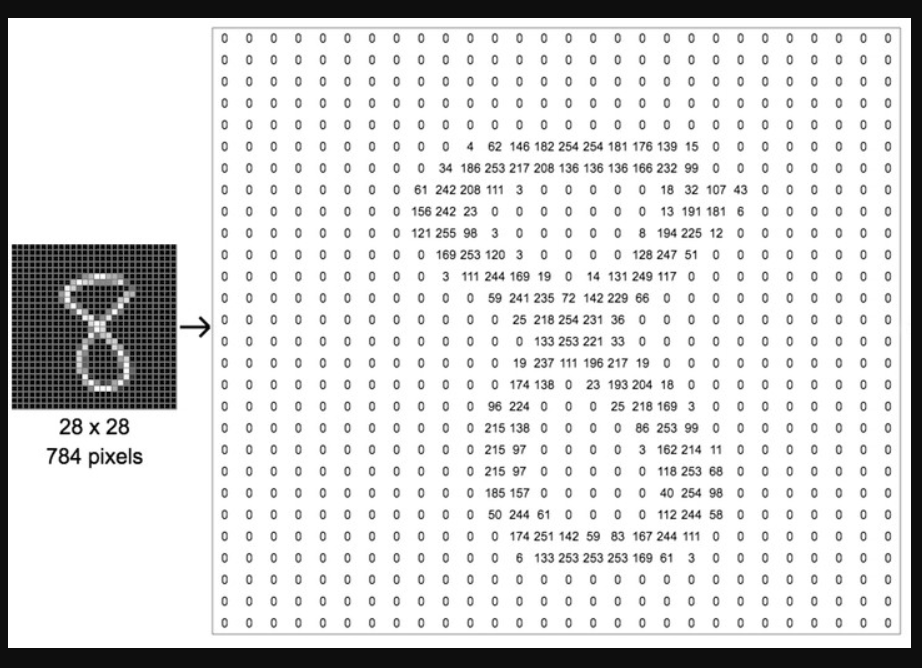

In [2]:
input_images_directory = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\Input_images"
output_dataset_path = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\dataset.csv"
max_rows = 50  # Maximum number of rows to generate
total_rows = 0  # Total number of rows written to the dataset

with open(output_dataset_path, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["label"] + list(range(784)))

for label in range(10):
    dirList = glob.glob(os.path.join(input_images_directory, str(label), "*.png"))

    for img_path in dirList:
        im = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        im_gray = cv2.GaussianBlur(im, (15, 15), 0)
        roi = cv2.resize(im_gray, (28, 28), interpolation=cv2.INTER_AREA)

        data = [label]
        rows, cols = roi.shape

        for i in range(rows):
            for j in range(cols):
                k = roi[i, j]
                if k > 100:
                    k = 1
                else:
                    k = 0
                data.append(k)

        with open(output_dataset_path, 'a', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(data)

        total_rows += 1
        if total_rows >= max_rows:
            break  # Break from the inner loop

    if total_rows >= max_rows:
        break  # Break from the outer loop

print("Dataset creation completed.")


Dataset creation completed.


### It will create a file named dataset.csv
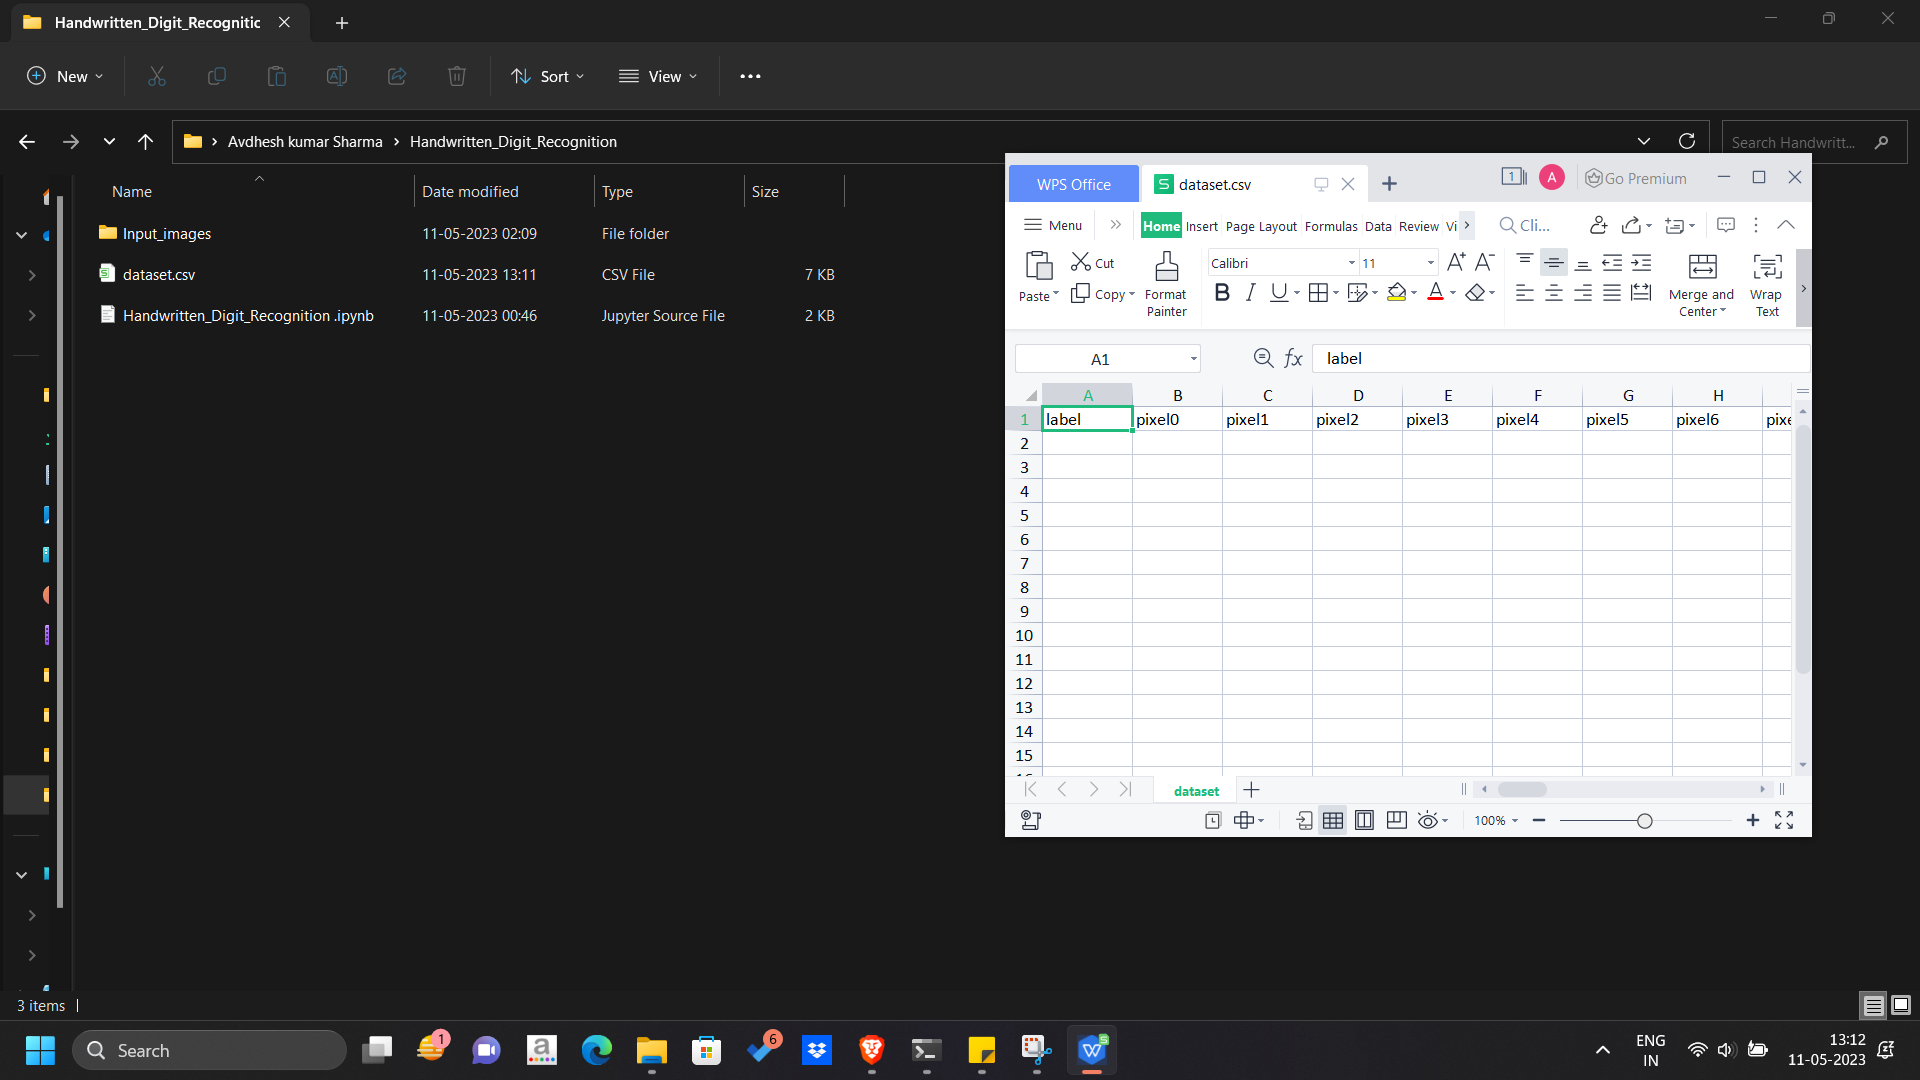

### This is Fill up value image
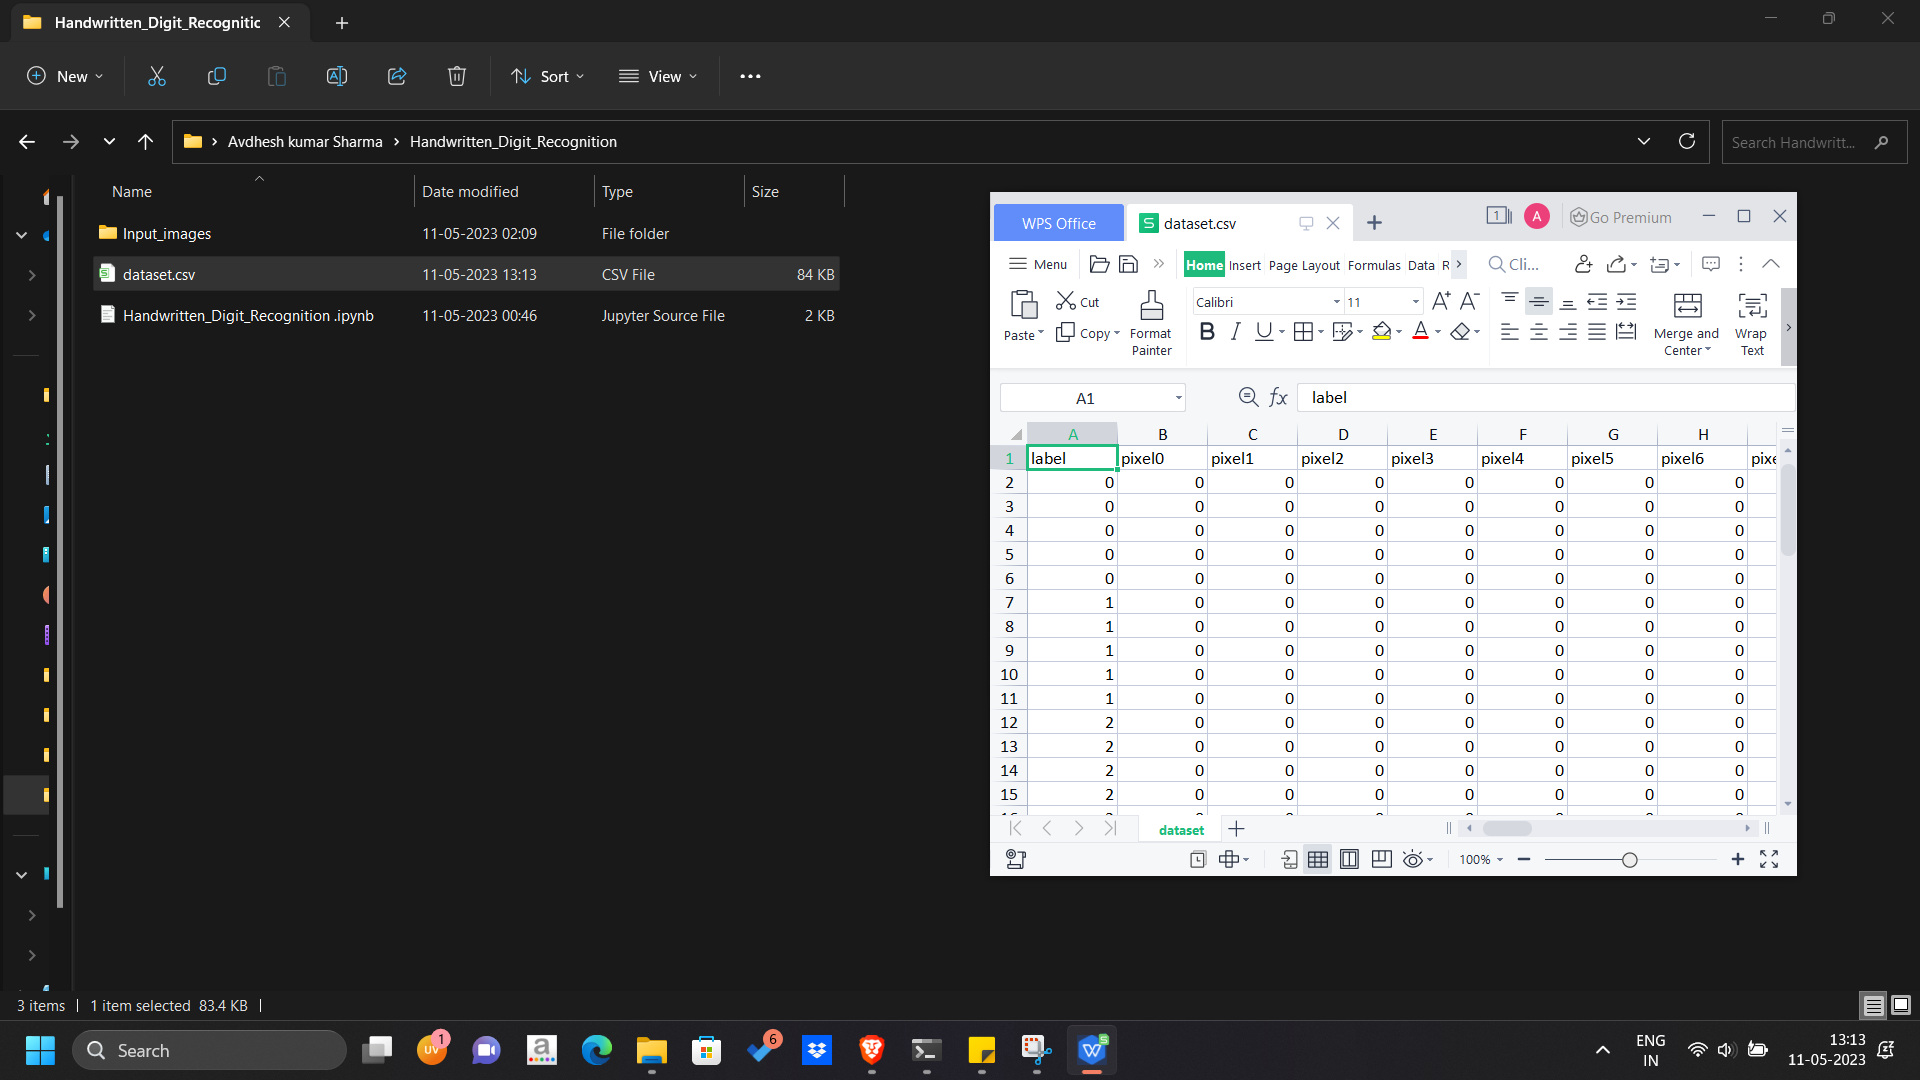

In [3]:
#loading  the dataset of original images 
data=pd.read_csv('dataset.csv')
df_original=shuffle(data)
df_original

#as wecan see this is empty file with 786 columns
# but we have a problem that row 51 and 52 have label , pixcel0 ,pixcel 1 etc so we need to remov e that

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
18      3       0       0       0       0       0       0       0       0   
17      3       0       0       0       0       0       0       0       0   
39      7       0       0       0       0       0       0       0       0   
27      5       0       0       0       0       0       0       0       0   
40      8       0       0       0       0       0       0       0       0   
37      7       0       0       0       0       0       0       0       0   
50  label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7   
24      4       0       0       0       0       0       0       0       0   
38      7       0       0       0       0       0       0       0       0   
8       1       0       0       0       0       0       0       0       0   
22      4       0       0       0       0       0       0       0       0   
48      9       0       0       0       0       0       0       0       0   
0       0       0       0       0       0       0       0       0       0   
42      8       0       0       0       0       0       0       0       0   
30      6       0       0       0       0       0       0       0       0   
12      2       0       0       0       0       0       0       0       0   
33      6       0       0       0       0       0       0       0       0   
46      9       0       0       0       0       0       0       0       0   
7       1       0       0       0       0       0       0       0       0   
36      7       0       0       0       0       0       0       0       0   
43      8       0       0       0       0       0       0       0       0   
23      4       0       0       0       0       0       0       0       0   
16      3       0       0       0       0       0       0       0       0   
9       1       0       0       0       0       0       0       0       0   
13      2       0       0       0       0       0       0       0       0   
35      7       0       0       0       0       0       0       0       0   
20      4       0       0       0       0       0       0       0       0   
41      8       0       0       0       0       0       0       0       0   
26      5       0       0       0       0       0       0       0       0   
5       1       0       0       0       0       0       0       0       0   
10      2       0       0       0       0       0       0       0       0   
14      2       0       0       0       0       0       0       0       0   
31      6       0       0       0       0       0       0       0       0   
34      6       0       0       0       0       0       0       0       0   
15      3       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
44      8       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
28      5       0       0       0       0       0       0       0       0   
47      9       0       0       0       0       0       0       0       0   
19      3       0       0       0       0       0       0       0       0   
49      9       0       0       0       0       0       0       0       0   
6       1       0       0       0       0       0       0       0       0   
29      5       0       0       0       0       0       0       0       0   
52  label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7   
21      4       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
45      9       0       0       0       0       0       0       0       0   
51  label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7   
11      2       0       0       0       0       0       0       0       0   
32      6       0       0       0       0       0       0       0       0   


In [4]:
# Remove rows 50, 51, and 52 as they contain unwanted letters.
df_original = df_original.drop([50, 51, 52], axis=0)

# Define the file path with escaped backslashes
dataset_path = "C:\\Users\\Acer pc\\Handwritten_Digit_Recognition\\dataset.csv"

# Save the modified DataFrame back to the original dataset file
df_original.to_csv(dataset_path, index=False)

print("Rows removed successfully. Dataset updated.")


Rows removed successfully. Dataset updated.


In [5]:
df_original


label pixel0 pixel1 pixel2 pixel3 pixel4 pixel5 pixel6 pixel7 pixel8  ...  \
18     3      0      0      0      0      0      0      0      0      0  ...   
17     3      0      0      0      0      0      0      0      0      0  ...   
39     7      0      0      0      0      0      0      0      0      0  ...   
27     5      0      0      0      0      0      0      0      0      0  ...   
40     8      0      0      0      0      0      0      0      0      0  ...   
37     7      0      0      0      0      0      0      0      0      0  ...   
24     4      0      0      0      0      0      0      0      0      0  ...   
38     7      0      0      0      0      0      0      0      0      0  ...   
8      1      0      0      0      0      0      0      0      0      0  ...   
22     4      0      0      0      0      0      0      0      0      0  ...   
48     9      0      0      0      0      0      0      0      0      0  ...   
0      0      0      0      0      0      0      0      0      0      0  ...   
42     8      0      0      0      0      0      0      0      0      0  ...   
30     6      0      0      0      0      0      0      0      0      0  ...   
12     2      0      0      0      0      0      0      0      0      0  ...   
33     6      0      0      0      0      0      0      0      0      0  ...   
46     9      0      0      0      0      0      0      0      0      0  ...   
7      1      0      0      0      0      0      0      0      0      0  ...   
36     7      0      0      0      0      0      0      0      0      0  ...   
43     8      0      0      0      0      0      0      0      0      0  ...   
23     4      0      0      0      0      0      0      0      0      0  ...   
16     3      0      0      0      0      0      0      0      0      0  ...   
9      1      0      0      0      0      0      0      0      0      0  ...   
13     2      0      0      0      0      0      0      0      0      0  ...   
35     7      0      0      0      0      0      0      0      0      0  ...   
20     4      0      0      0      0      0      0      0      0      0  ...   
41     8      0      0      0      0      0      0      0      0      0  ...   
26     5      0      0      0      0      0      0      0      0      0  ...   
5      1      0      0      0      0      0      0      0      0      0  ...   
10     2      0      0      0      0      0      0      0      0      0  ...   
14     2      0      0      0      0      0      0      0      0      0  ...   
31     6      0      0      0      0      0      0      0      0      0  ...   
34     6      0      0      0      0      0      0      0      0      0  ...   
15     3      0      0      0      0      0      0      0      0      0  ...   
2      0      0      0      0      0      0      0      0      0      0  ...   
44     8      0      0      0      0      0      0      0      0      0  ...   
1      0      0      0      0      0      0      0      0      0      0  ...   
28     5      0      0      0      0      0      0      0      0      0  ...   
47     9      0      0      0      0      0      0      0      0      0  ...   
19     3      0      0      0      0      0      0      0      0      0  ...   
49     9      0      0      0      0      0      0      0      0      0  ...   
6      1      0      0      0      0      0      0      0      0      0  ...   
29     5      0      0      0      0      0      0      0      0      0  ...   
21     4      0      0      0      0      0      0      0      0      0  ...   
3      0      0      0      0      0      0      0      0      0      0  ...   
45     9      0      0      0      0      0      0      0      0      0  ...   
11     2      0      0      0      0      0      0      0      0      0  ...   
32     6      0      0      0      0      0      0      0      0      0  ...   
25     5      0      0      0      0      0      0      0      0      0  ...   
4  

## Now creating actual dataset for training which is composed for augmented data 

This is the csv file made by augmented images 
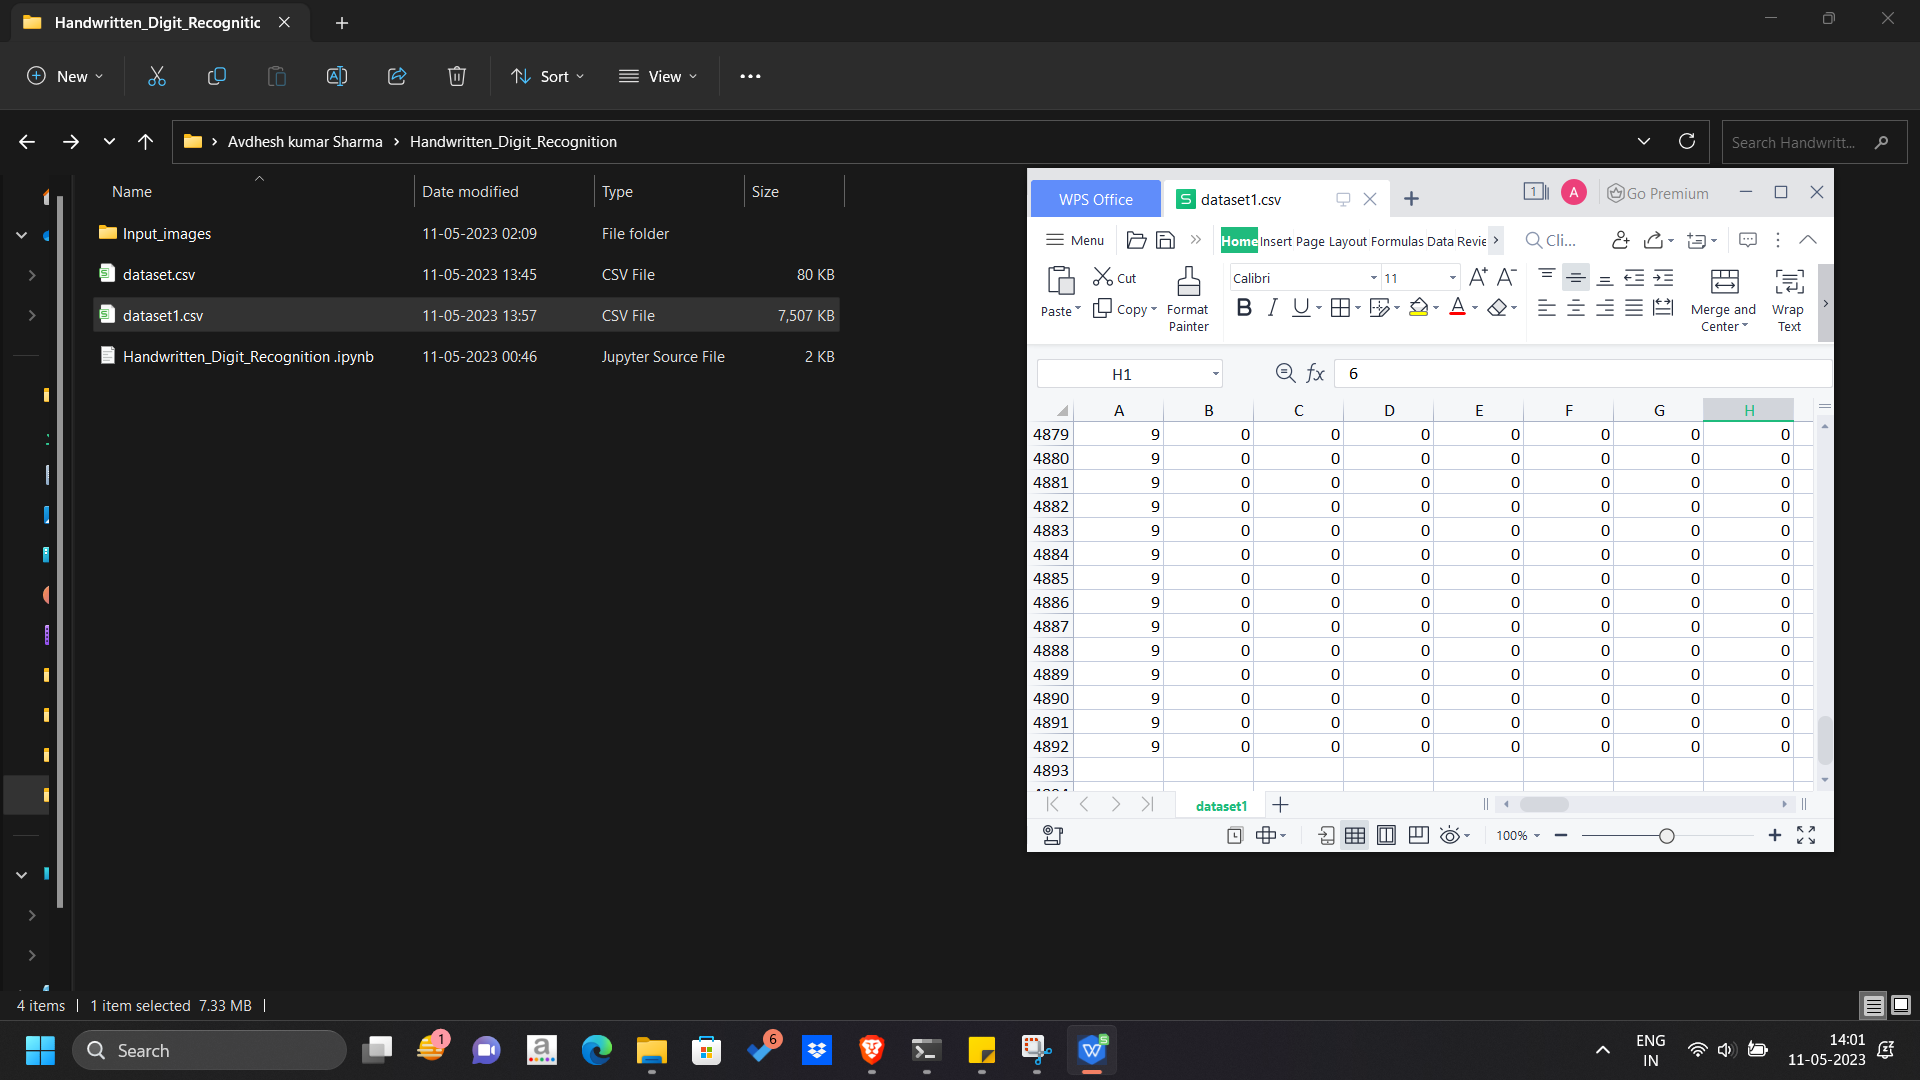

In [6]:
#loading  the dataset of augmented dataset
data=pd.read_csv(r"C:\Users\Acer pc\Handwritten_Digit_Recognition\dataset1.csv")
df_ag=shuffle(data)
df_ag

label  0  1  2  3  4  5  6  7  8  ...  774  775  776  777  778  779  \
1353      2  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
622       1  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
2151      4  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
3369      6  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
1301      2  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
...     ... .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...   
4391      8  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
2059      4  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
30        0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
250       0  0  0  0  0  0  0  0  0  0  ...    1    0    0    0    0    0   
349       0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   

      780  781  782  783  
1353    0    0    0    0  
622     0    0    0    0  
2151    0    0    0    0  
3369    0    0    0    0  
1301    0    0    0    0  
...   ...  ...  ...  ...  
4391    0    0    0    0  
2059    0    0    0    0  
30      0    0    0    0  
250     0    0    0    0  
349     0    0    0    0  

[4891 rows x 785 columns]

### but again one problem we have is the column name it must be like pixcel_0 then 1 to 785 


In [7]:
#now lets rename the columns like pixcel_0 to pixcel_783
df_ag.rename(columns={'first column': 'label'},inplace=True)
df_ag

label  0  1  2  3  4  5  6  7  8  ...  774  775  776  777  778  779  \
1353      2  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
622       1  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
2151      4  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
3369      6  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
1301      2  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
...     ... .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...   
4391      8  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
2059      4  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
30        0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
250       0  0  0  0  0  0  0  0  0  0  ...    1    0    0    0    0    0   
349       0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   

      780  781  782  783  
1353    0    0    0    0  
622     0    0    0    0  
2151    0    0    0    0  
3369    0    0    0    0  
1301    0    0    0    0  
...   ...  ...  ...  ...  
4391    0    0    0    0  
2059    0    0    0    0  
30      0    0    0    0  
250     0    0    0    0  
349     0    0    0    0  

[4891 rows x 785 columns]

In [8]:
new_column_names = {'first column': 'label'}
new_column_names.update({str(i): f'pixel_{i}' for i in range(784)})
df_ag.rename(columns=new_column_names, inplace=True)

# Print the updated DataFrame
df_ag

label  pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  \
1353      2        0        0        0        0        0        0        0   
622       1        0        0        0        0        0        0        0   
2151      4        0        0        0        0        0        0        0   
3369      6        0        0        0        0        0        0        0   
1301      2        0        0        0        0        0        0        0   
...     ...      ...      ...      ...      ...      ...      ...      ...   
4391      8        0        0        0        0        0        0        0   
2059      4        0        0        0        0        0        0        0   
30        0        0        0        0        0        0        0        0   
250       0        0        0        0        0        0        0        0   
349       0        0        0        0        0        0        0        0   

      pixel_7  pixel_8  ...  pixel_774  pixel_775  pixel_776  pixel_777  \
1353        0        0  ...          0          0          0          0   
622         0        0  ...          0          0          0          0   
2151        0        0  ...          0          0          0          0   
3369        0        0  ...          0          0          0          0   
1301        0        0  ...          0          0          0          0   
...       ...      ...  ...        ...        ...        ...        ...   
4391        0        0  ...          0          0          0          0   
2059        0        0  ...          0          0          0          0   
30          0        0  ...          0          0          0          0   
250         0        0  ...          1          0          0          0   
349         0        0  ...          0          0          0          0   

      pixel_778  pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  
1353          0          0          0          0          0          0  
622           0          0          0          0          0          0  
2151          0          0          0          0          0          0  
3369          0          0          0          0          0          0  
1301          0          0          0          0          0          0  
...         ...        ...        ...        ...        ...        ...  
4391          0          0          0          0          0          0  
2059          0          0          0          0          0          0  
30            0          0          0          0          0          0  
250           0          0          0          0          0          0  
349           0          0          0          0          0          0  

[4891 rows x 785 columns]

# Preprocessing this data
### As you know preprocessing is essential before procedding further , We have to do 5 things which are :-

1.Checking NAN Values if present then remove . 

2.Split the dataset into features and labels or dependent and indepenedent variables.

3.Normalization of the feature values or in this case pixels.

4.Splitting the dataset into training and testing sets.


5.Respaing the data for the suitable machine learning model.



### Checking Null or Nan Values 

In [9]:
#Checking in df_original Dataset
df_original.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [10]:
#Checking in df_ag Dataset
df_ag.isnull().sum()

label        0
pixel_0      0
pixel_1      0
pixel_2      0
pixel_3      0
            ..
pixel_779    0
pixel_780    0
pixel_781    0
pixel_782    0
pixel_783    0
Length: 785, dtype: int64

### 1. Splitting the dataset into Features and Labels or dependent and indepenedent variables.

In [11]:
X_original = df_original.drop(["label"],axis=1)
Y_original= df_original["label"]
 

In [12]:
#Inpedendent Variables or features
X_original

pixel0 pixel1 pixel2 pixel3 pixel4 pixel5 pixel6 pixel7 pixel8 pixel9  ...  \
18      0      0      0      0      0      0      0      0      0      0  ...   
17      0      0      0      0      0      0      0      0      0      0  ...   
39      0      0      0      0      0      0      0      0      0      0  ...   
27      0      0      0      0      0      0      0      0      0      0  ...   
40      0      0      0      0      0      0      0      0      0      0  ...   
37      0      0      0      0      0      0      0      0      0      0  ...   
24      0      0      0      0      0      0      0      0      0      0  ...   
38      0      0      0      0      0      0      0      0      0      0  ...   
8       0      0      0      0      0      0      0      0      0      0  ...   
22      0      0      0      0      0      0      0      0      0      0  ...   
48      0      0      0      0      0      0      0      0      0      0  ...   
0       0      0      0      0      0      0      0      0      0      0  ...   
42      0      0      0      0      0      0      0      0      0      0  ...   
30      0      0      0      0      0      0      0      0      0      0  ...   
12      0      0      0      0      0      0      0      0      0      0  ...   
33      0      0      0      0      0      0      0      0      0      0  ...   
46      0      0      0      0      0      0      0      0      0      0  ...   
7       0      0      0      0      0      0      0      0      0      0  ...   
36      0      0      0      0      0      0      0      0      0      0  ...   
43      0      0      0      0      0      0      0      0      0      0  ...   
23      0      0      0      0      0      0      0      0      0      0  ...   
16      0      0      0      0      0      0      0      0      0      0  ...   
9       0      0      0      0      0      0      0      0      0      0  ...   
13      0      0      0      0      0      0      0      0      0      0  ...   
35      0      0      0      0      0      0      0      0      0      0  ...   
20      0      0      0      0      0      0      0      0      0      0  ...   
41      0      0      0      0      0      0      0      0      0      0  ...   
26      0      0      0      0      0      0      0      0      0      0  ...   
5       0      0      0      0      0      0      0      0      0      0  ...   
10      0      0      0      0      0      0      0      0      0      0  ...   
14      0      0      0      0      0      0      0      0      0      0  ...   
31      0      0      0      0      0      0      0      0      0      0  ...   
34      0      0      0      0      0      0      0      0      0      0  ...   
15      0      0      0      0      0      0      0      0      0      0  ...   
2       0      0      0      0      0      0      0      0      0      0  ...   
44      0      0      0      0      0      0      0      0      0      0  ...   
1       0      0      0      0      0      0      0      0      0      0  ...   
28      0      0      0      0      0      0      0      0      0      0  ...   
47      0      0      0      0      0      0      0      0      0      0  ...   
19      0      0      0      0      0      0      0      0      0      0  ...   
49      0      0      0      0      0      0      0      0      0      0  ...   
6       0      0      0      0      0      0      0      0      0      0  ...   
29      0      0      0      0      0      0      0      0      0      0  ...   
21      0      0      0      0      0      0      0      0      0      0  ...   
3       0      0      0      0      0      0      0      0      0      0  ...   
45      0      0      0      0      0      0      0      0      0      0  ...   
11      0      0      0      0      0      0      0      0      0      0  ...   
32      0      0      0      0      0      0      0      0      0      0  ...   
25      0      0      0      0    

In [13]:
#Size of the Independent Variables 
X_original.shape

(50, 784)

In [14]:
#Label
Y_original

18    3
17    3
39    7
27    5
40    8
37    7
24    4
38    7
8     1
22    4
48    9
0     0
42    8
30    6
12    2
33    6
46    9
7     1
36    7
43    8
23    4
16    3
9     1
13    2
35    7
20    4
41    8
26    5
5     1
10    2
14    2
31    6
34    6
15    3
2     0
44    8
1     0
28    5
47    9
19    3
49    9
6     1
29    5
21    4
3     0
45    9
11    2
32    6
25    5
4     0
Name: label, dtype: object

In [15]:
#Size of the dependent Variables 
Y_original.shape

(50,)

## Visualization of few of the images of original data using Matplotlib

This is the original Number: 6
This will be its image:


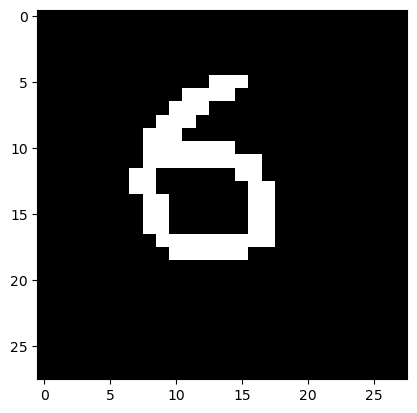

In [16]:
# As we have to convert the values into float also in order to use the matplotlib properly

idx = 31
img = X_original.iloc[idx].values.astype('float32').reshape(28, 28)
print("This is the original Number:",Y_original.iloc[idx])
plt.imshow(img, cmap='gray')
print("This will be its image:")

plt.show()


This is the original Number: 0
This will be its image:


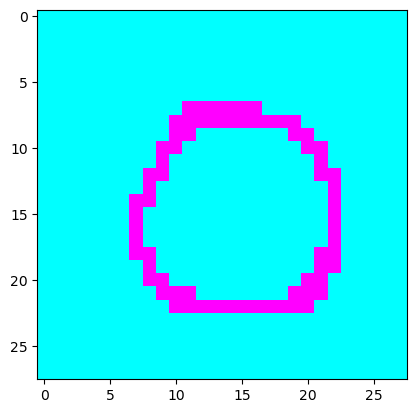

In [17]:
%matplotlib inline
idx = 49
img = X_original.iloc[idx].values.astype('float32').reshape(28, 28)
print("This is the original Number:",Y_original.iloc[idx])
plt.imshow(img, cmap='cool')
print("This will be its image:")

plt.show()

This is the original Number: 7
This will be its image:


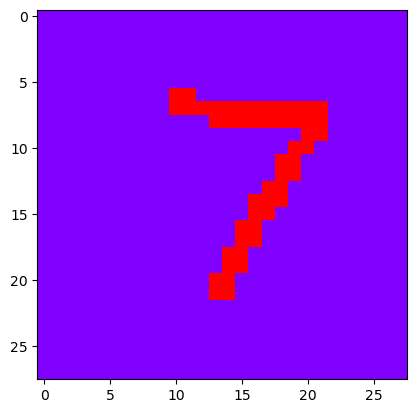

In [18]:
%matplotlib inline
idx = 7
img = X_original.iloc[idx].values.astype('float32').reshape(28, 28)
print("This is the original Number:",Y_original.iloc[idx])
plt.imshow(img, cmap='rainbow')
print("This will be its image:")

plt.show()

This is the original Number: 7
This will be its image:


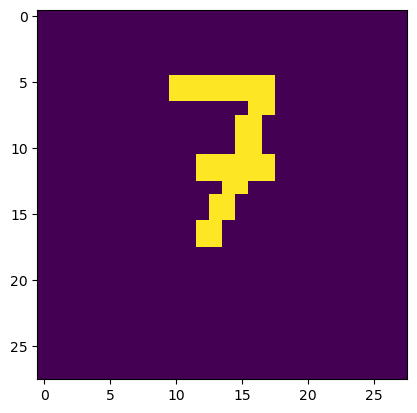

In [19]:
%matplotlib inline
idx = 24
img = X_original.iloc[idx].values.astype('float32').reshape(28, 28)
print("This is the original Number:",Y_original.iloc[idx])
plt.imshow(img, cmap='viridis')
print("This will be its image:")

plt.show()

This is the original Number: 8
This will be its image:


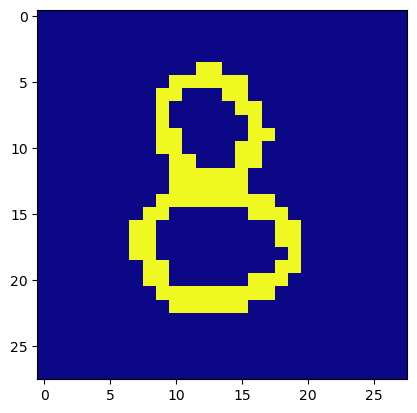

In [20]:
%matplotlib inline
idx = 19
img = X_original.iloc[idx].values.astype('float32').reshape(28, 28)
print("This is the original Number:",Y_original.iloc[idx])
plt.imshow(img, cmap='plasma')
print("This will be its image:")

plt.show()

### SO i use few more colormap like 'gray', 'hot', 'cool', 'jet', 'viridis,'plasma','inferno','magma','hsv', 'nipy_spectral', 'rainbow'

# Now splitting df_ag into features and labels .

In [21]:
X_ag = df_ag.drop(["label"],axis=1)
Y_ag= df_ag["label"]
 

In [22]:
#X_ag is the independent variables for augmented data
X_ag

pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
1353        0        0        0        0        0        0        0        0   
622         0        0        0        0        0        0        0        0   
2151        0        0        0        0        0        0        0        0   
3369        0        0        0        0        0        0        0        0   
1301        0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
4391        0        0        0        0        0        0        0        0   
2059        0        0        0        0        0        0        0        0   
30          0        0        0        0        0        0        0        0   
250         0        0        0        0        0        0        0        0   
349         0        0        0        0        0        0        0        0   

      pixel_8  pixel_9  ...  pixel_774  pixel_775  pixel_776  pixel_777  \
1353        0        0  ...          0          0          0          0   
622         0        0  ...          0          0          0          0   
2151        0        0  ...          0          0          0          0   
3369        0        0  ...          0          0          0          0   
1301        0        0  ...          0          0          0          0   
...       ...      ...  ...        ...        ...        ...        ...   
4391        0        0  ...          0          0          0          0   
2059        0        0  ...          0          0          0          0   
30          0        0  ...          0          0          0          0   
250         0        0  ...          1          0          0          0   
349         0        0  ...          0          0          0          0   

      pixel_778  pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  
1353          0          0          0          0          0          0  
622           0          0          0          0          0          0  
2151          0          0          0          0          0          0  
3369          0          0          0          0          0          0  
1301          0          0          0          0          0          0  
...         ...        ...        ...        ...        ...        ...  
4391          0          0          0          0          0          0  
2059          0          0          0          0          0          0  
30            0          0          0          0          0          0  
250           0          0          0          0          0          0  
349           0          0          0          0          0          0  

[4891 rows x 784 columns]

In [23]:
#X_ag shapes
X_ag.shape

(4891, 784)

In [24]:
#Y_ag is the dependent variables for augmented data
Y_ag

1353    2
622     1
2151    4
3369    6
1301    2
       ..
4391    8
2059    4
30      0
250     0
349     0
Name: label, Length: 4891, dtype: int64

In [25]:
#Y_ag shapes
Y_ag.shape

(4891,)

## Visualization of few of the images of original data using Matplotlib


This is the original Number: 6
This will be its image:


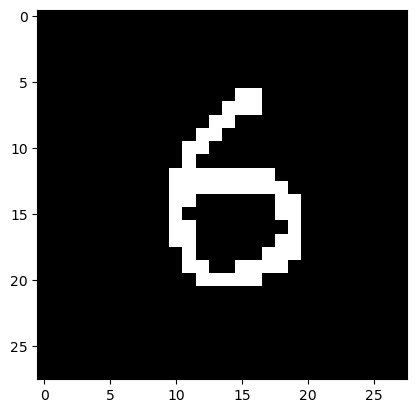

In [26]:
# As we have to convert the values into float also in order to use the matplotlib properly
idx = 3100
img = X_ag.iloc[idx].values.astype('float32').reshape(28, 28)
print("This is the original Number:",Y_ag.iloc[idx])
plt.imshow(img, cmap='gray')
print("This will be its image:")
plt.show()


This is the original Number: 1
This will be its image:


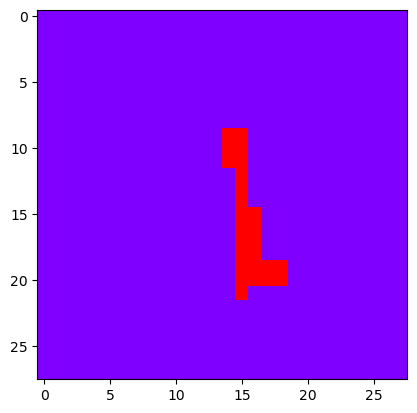

In [27]:
idx = 4800
img = X_ag.iloc[idx].values.astype('float32').reshape(28, 28)
print("This is the original Number:",Y_ag.iloc[idx])
plt.imshow(img, cmap='rainbow')
print("This will be its image:")
plt.show()

This is the original Number: 6
This will be its image:


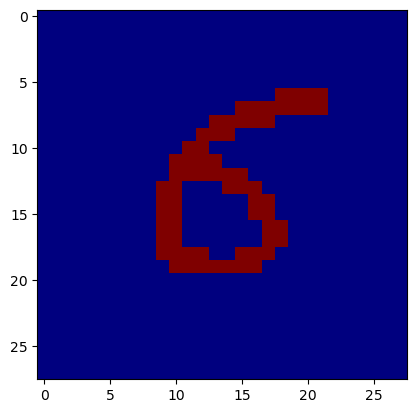

In [28]:
idx = 5
img = X_ag.iloc[idx].values.astype('float32').reshape(28, 28)
print("This is the original Number:",Y_ag.iloc[idx])
plt.imshow(img, cmap='jet')
print("This will be its image:")
plt.show()

In [29]:
# We Dont need Normalization as all the data we have doesn't have any biasing

# Train-Test Split of the Dataset of original images

In [30]:
from sklearn.model_selection import train_test_split
train_x_original,test_x_original,train_y_original,test_y_original = train_test_split(X_original,Y_original, test_size = 0.2)

In [31]:
# Shapes of all the splits of original dataset
print("Train size of X:",train_x_original.shape)
print("Test size of X:",test_x_original.shape)
print("Train size of Y:",train_y_original.shape)
print("Test size of X:",test_y_original.shape)

Train size of X: (40, 784)
Test size of X: (10, 784)
Train size of Y: (40,)
Test size of X: (10,)


# SVC on original Dataset

In [32]:
#Fit the  of original data using svc and also to save the model using joblib
import joblib
from sklearn.svm import SVC

# Specify the absolute file path for saving the model
model_path = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\model\digit_recognizer1"

classifier1 = SVC(kernel="linear", random_state=6)
classifier1.fit(train_x_original, train_y_original)

# Save the trained model to the specified file path
joblib.dump(classifier1, model_path)


['C:\\Users\\Acer pc\\Handwritten_Digit_Recognition\\model\\digit_recognizer1']

In [33]:
print("indices of support vectors: ",classifier1.support_)

indices of support vectors:  [ 6 22 26 31 36  7 17 28 30  5 10 18 38 14 24 35 39  3  9 25 27 32 16 19
 33 37  1  8 12 29 34  4 11 21  0  2 13 15 20 23]


In [34]:
print("support vectors: ",classifier1.support_vectors_)


support vectors:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [35]:
print("coefficients of the support vector machine: ",classifier1.dual_coef_)


coefficients of the support vector machine:  [[ 0.01185212  0.00207657  0.01274648  0.0096266   0.02307049 -0.02174938
  -0.01255861 -0.01812807 -0.0069362  -0.00732586 -0.01724822 -0.01066668
  -0.00622031 -0.01375344 -0.01097881 -0.00023334 -0.0185493  -0.0066035
  -0.00920041 -0.01262599 -0.         -0.01903489 -0.01413623 -0.00428764
  -0.02409482 -0.01344291 -0.00863367 -0.01106702 -0.01849196 -0.00734448
  -0.00958275 -0.02459793 -0.         -0.02942771 -0.02358369 -0.00839877
  -0.00548123 -0.02140114 -0.02040651 -0.00725127]
 [ 0.01115251  0.00155858  0.00846577  0.00622445  0.01405975  0.01565191
   0.0328581   0.01761305  0.01246308 -0.0280142  -0.02135697 -0.02921496
  -0.         -0.01308025 -0.00197001 -0.02987509 -0.03354964 -0.02736426
  -0.00936324 -0.0134745  -0.00067029 -0.01830445 -0.01236282 -0.
  -0.03227537 -0.02072901 -0.00924637 -0.00816231 -0.02827447 -0.01697716
  -0.00935415 -0.02414253 -0.01268334 -0.026293   -0.02144535 -0.01290252
  -0.0102935  -0.01363775

In [36]:
print("intercepts of the decision function: ",classifier1.intercept_)

intercepts of the decision function:  [-0.42270451  0.01798061 -0.02210237 -0.14711237  0.06831144  0.11883052
 -0.09839517  0.76745969 -0.05767136  0.62693198  0.5626498   0.30320364
  0.56649725  0.7119518   0.33914588  0.88586492  0.37487108 -0.18480855
 -0.24124793  0.04077901  0.13591988 -0.18533806  0.62969375 -0.04517311
 -0.26327715  0.16717255  0.24143545 -0.05726004  0.75300964  0.06482161
  0.29474452  0.24849659  0.21287487  0.87738781  0.24212138 -0.03057436
 -0.23003601  0.9759925  -0.14523088 -0.20330117  0.89449068 -0.14260174
  0.88142492  0.02075092 -0.76275252]


## calculate accuracy of the model on original images

In [37]:

from sklearn import metrics
prediction1=classifier1.predict(test_x_original)
print("Accuracy= ",metrics.accuracy_score(prediction1, test_y_original)*100)

Accuracy=  50.0


In [38]:
#Accuracy is 50% so that means it is not good , now lets try on the Augmentation images

# Train-Test Split of the Dataset of Augmentation images

In [39]:
from sklearn.model_selection import train_test_split
train_x_ag,test_x_ag,train_y_ag,test_y_ag = train_test_split(X_ag,Y_ag, test_size = 0.2)

In [40]:
# Shapes of all the splits of Augmentation dataset
print("Train size of X:",train_x_ag.shape)
print("Test size of X:",test_x_ag.shape)
print("Train size of Y:",train_y_ag.shape)
print("Test size of X:",test_y_ag.shape)

Train size of X: (3912, 784)
Test size of X: (979, 784)
Train size of Y: (3912,)
Test size of X: (979,)


# SVC model on augmented images

In [41]:
#Fit the  of Augmentation data using svc and also to save the model using joblib
import joblib
from sklearn.svm import SVC

# Specify the absolute file path for saving the model
model_path = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\model\digit_recognizer2"

classifier2 = SVC(kernel="linear", random_state=6)
classifier2.fit(train_x_ag, train_y_ag)

# Save the trained model to the specified file path
joblib.dump(classifier2, model_path)


['C:\\Users\\Acer pc\\Handwritten_Digit_Recognition\\model\\digit_recognizer2']

In [42]:
print("indices of support vectors: ",classifier2.support_)

indices of support vectors:  [  38   85  113 ... 3827 3876 3896]


In [43]:
print("support vectors: ",classifier2.support_vectors_)


support vectors:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
print("coefficients of the support vector machine: ",classifier2.dual_coef_)


coefficients of the support vector machine:  [[ 0.          0.00435274  0.         ... -0.         -0.04559543
  -0.        ]
 [ 0.          0.0055227   0.         ... -0.         -0.0093823
  -0.        ]
 [ 0.0209739   0.00134692  0.         ... -0.         -0.00084937
  -0.        ]
 ...
 [ 0.          0.04184927  0.00510138 ... -0.         -0.
  -0.        ]
 [ 0.          0.00208578  0.00251478 ... -0.05497257 -0.10130312
  -0.        ]
 [ 0.          0.01338785  0.         ... -0.         -0.
  -0.        ]]


In [45]:
print("intercepts of the decision function: ",classifier2.intercept_)

intercepts of the decision function:  [-0.82671037  0.18222091  0.51563793 -0.51044814  1.86330145  2.24013296
 -0.50360328  2.33682608  0.70493962  7.90950382  4.80118987  2.24653397
  3.18986376  4.25111859  2.24013266  2.78526937  1.51898331  0.40715827
 -1.74758742  1.95915021  5.93630123 -0.59145529  4.36363222  0.7809295
 -2.25363351  0.88091641  2.22463725 -4.35821101  6.06230121  0.26589719
  4.29533484  1.71533265 -1.01829993  3.56520385  3.13689561  7.06458711
 -3.99819232  8.0936682   0.99405945 -2.6209568   6.49204082 -0.57422527
  4.76971727  5.06514727 -4.43478347]


## calculate accuracy of the model on original images

In [46]:

from sklearn import metrics
prediction2=classifier2.predict(test_x_ag)
print("Accuracy= ",metrics.accuracy_score(prediction2, test_y_ag)*100)

Accuracy=  82.32890704800818


### From my knowledge i think i have three ways to increase the accuracy first is HyperParameter Tuning or using Different Model Selection and the final way is neural Network

In [47]:
# lets take Different Model like Random Forests, Naive Bayes,Gradient Boosting,K-Nearest Neighbors

# Random Forest Classifiers on original dataset

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier object for 
classifier3 = RandomForestClassifier(n_estimators=100, random_state=6)

# Specify the absolute file path for saving the model
model_path = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\model\RFC"

# Train the classifier on the training data
classifier3.fit(train_x_original, train_y_original)

# Make predictions on the test data
predictions = classifier3.predict(test_x_original)

# Save the trained model to the specified file path
joblib.dump(classifier3, model_path)



['C:\\Users\\Acer pc\\Handwritten_Digit_Recognition\\model\\RFC']

## Accuracy in original images

In [49]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(test_y_original, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5


# Random Forest Classifiers on Augmentation dataset

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier object for 
classifier4 = RandomForestClassifier(n_estimators=100, random_state=6)

# Specify the absolute file path for saving the model
model_path = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\model\RFC_ag"

# Train the classifier on the training data
classifier4.fit(train_x_ag, train_y_ag)

# Make predictions on the test data
predictions = classifier4.predict(test_x_ag)

# Save the trained model to the specified file path
joblib.dump(classifier4, model_path)



['C:\\Users\\Acer pc\\Handwritten_Digit_Recognition\\model\\RFC_ag']

## Accuracy in Augmentation images

In [51]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(test_y_ag, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.95097037793667


# GradientBoostingClassifier on original dataset

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a Gradient Boosting classifier object
classifier5 = GradientBoostingClassifier(n_estimators=100, random_state=6)

# Specify the absolute file path for saving the model
model_path = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\model\GB"

# Train the classifier on the training data
classifier5.fit(train_x_original, train_y_original)

# Make predictions on the test data
predictions = classifier5.predict(test_x_original)

# Save the trained model to the specified file path
joblib.dump(classifier5, model_path)


['C:\\Users\\Acer pc\\Handwritten_Digit_Recognition\\model\\GB']

## Accuracy in original images

In [53]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(test_y_original, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.4


# GradientBoostingClassifier on Augmentation dataset

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a Gradient Boosting classifier object
classifier6 = GradientBoostingClassifier(n_estimators=100, random_state=6)

# Specify the absolute file path for saving the model
model_path = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\model\GB_ag"

# Train the classifier on the training data
classifier6.fit(train_x_ag, train_y_ag)

# Make predictions on the test data
predictions = classifier6.predict(test_x_ag)

# Save the trained model to the specified file path
joblib.dump(classifier6, model_path)


['C:\\Users\\Acer pc\\Handwritten_Digit_Recognition\\model\\GB_ag']

## Accuracy in Augmentation images

In [55]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(test_y_ag, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.8723186925434117


# NaiveBayes on original dataset

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import joblib

# Create a Naive Bayes classifier object
classifier7 = GaussianNB()

# Specify the absolute file path for saving the model
model_path_nb = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\model\NB"

# Train the Naive Bayes classifier on the training data
classifier7.fit(train_x_original, train_y_original)

# Make predictions on the test data
predictions_nb = classifier7.predict(test_x_original)

# Save the trained model to the specified file path
joblib.dump(classifier7, model_path_nb)


['C:\\Users\\Acer pc\\Handwritten_Digit_Recognition\\model\\NB']

## Accuracy in Original images

In [57]:
# Calculate the accuracy of the classifier
accuracy_nb = accuracy_score(test_y_original, predictions_nb)

# Print the accuracy
print("Naive Bayes Accuracy:", accuracy_nb)


Naive Bayes Accuracy: 0.1


# NaiveBayes on Augmentation dataset

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import joblib

# Create a Naive Bayes classifier object
classifier8 = GaussianNB()

# Specify the absolute file path for saving the model
model_path_nb = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\model\NB_ag"

# Train the Naive Bayes classifier on the training data
classifier8.fit(train_x_ag, train_y_ag)

# Make predictions on the test data
predictions_nb = classifier8.predict(test_x_ag)

# Save the trained model to the specified file path
joblib.dump(classifier8, model_path_nb)


['C:\\Users\\Acer pc\\Handwritten_Digit_Recognition\\model\\NB_ag']

## Accuracy in Augmentation images

In [59]:
# Calculate the accuracy of the classifier
accuracy_nb = accuracy_score(test_y_ag, predictions_nb)

# Print the accuracy
print("Naive Bayes Accuracy:", accuracy_nb)


Naive Bayes Accuracy: 0.34831460674157305


# KNN on original Dataset with N=5


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib

# Create a K-Nearest Neighbors (KNN) classifier object
classifier9 = KNeighborsClassifier(n_neighbors=5)

# Specify the absolute file path for saving the model
model_path_knn = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\model\KNN"

# Train the KNN classifier on the training data
classifier9.fit(train_x_original, train_y_original)

# Make predictions on the test data
predictions_knn = classifier9.predict(test_x_original)

# Save the trained model to the specified file path
joblib.dump(classifier9, model_path_knn)



C:\Users\Acer pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


['C:\\Users\\Acer pc\\Handwritten_Digit_Recognition\\model\\KNN']

## Accuracy in original dataset with N=5

In [61]:
# Calculate the accuracy of the classifier
accuracy_knn = accuracy_score(test_y_original, predictions_knn)
# Print the accuracy
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.3


# KNN on original Dataset with N=10


In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib

# Create a K-Nearest Neighbors (KNN) classifier object
classifier10 = KNeighborsClassifier(n_neighbors=10)

# Specify the absolute file path for saving the model
model_path_knn = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\model\KNN_10"

# Train the KNN classifier on the training data
classifier10.fit(train_x_original, train_y_original)

# Make predictions on the test data
predictions_knn = classifier10.predict(test_x_original)

# Save the trained model to the specified file path
joblib.dump(classifier10, model_path_knn)



C:\Users\Acer pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


['C:\\Users\\Acer pc\\Handwritten_Digit_Recognition\\model\\KNN_10']

In [63]:
# Calculate the accuracy of the classifier
accuracy_knn = accuracy_score(test_y_original, predictions_knn)
# Print the accuracy
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.3


# KNN on original Dataset with N=1

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib

# Create a K-Nearest Neighbors (KNN) classifier object
classifier11 = KNeighborsClassifier(n_neighbors=1)

# Specify the absolute file path for saving the model
model_path_knn = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\model\KNN_1"

# Train the KNN classifier on the training data
classifier11.fit(train_x_original, train_y_original)

# Make predictions on the test data
predictions_knn = classifier11.predict(test_x_original)

# Save the trained model to the specified file path
joblib.dump(classifier11, model_path_knn)



C:\Users\Acer pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


['C:\\Users\\Acer pc\\Handwritten_Digit_Recognition\\model\\KNN_1']

In [65]:
# Calculate the accuracy of the classifier
accuracy_knn = accuracy_score(test_y_original, predictions_knn)
# Print the accuracy
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.5


# KNN on Augmentation Dataset with N=5

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib

# Create a K-Nearest Neighbors (KNN) classifier object
classifier12 = KNeighborsClassifier(n_neighbors=5)

# Specify the absolute file path for saving the model
model_path_knn = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\model\KNN_ag_5"

# Train the KNN classifier on the training data
classifier12.fit(train_x_ag, train_y_ag)

# Make predictions on the test data
predictions_knn = classifier12.predict(test_x_ag)

# Save the trained model to the specified file path
joblib.dump(classifier12, model_path_knn)



C:\Users\Acer pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


['C:\\Users\\Acer pc\\Handwritten_Digit_Recognition\\model\\KNN_ag_5']

In [67]:
# Calculate the accuracy of the classifier
accuracy_knn = accuracy_score(test_y_ag, predictions_knn)
# Print the accuracy
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.8937691521961185


# KNN on Augmentation Dataset with N=10

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib

# Create a K-Nearest Neighbors (KNN) classifier object
classifier13 = KNeighborsClassifier(n_neighbors=10)

# Specify the absolute file path for saving the model
model_path_knn = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\model\KNN_ag_10"

# Train the KNN classifier on the training data
classifier13.fit(train_x_ag, train_y_ag)

# Make predictions on the test data
predictions_knn = classifier13.predict(test_x_ag)

# Save the trained model to the specified file path
joblib.dump(classifier13, model_path_knn)



C:\Users\Acer pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


['C:\\Users\\Acer pc\\Handwritten_Digit_Recognition\\model\\KNN_ag_10']

In [69]:
# Calculate the accuracy of the classifier
accuracy_knn = accuracy_score(test_y_ag, predictions_knn)
# Print the accuracy
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.8406537282941777


# KNN on Augmentation Dataset with N=1

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib

# Create a K-Nearest Neighbors (KNN) classifier object
classifier14 = KNeighborsClassifier(n_neighbors=1)

# Specify the absolute file path for saving the model
model_path_knn = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\model\KNN_ag_1"

# Train the KNN classifier on the training data
classifier14.fit(train_x_ag, train_y_ag)

# Make predictions on the test data
predictions_knn = classifier14.predict(test_x_ag)

# Save the trained model to the specified file path
joblib.dump(classifier14, model_path_knn)



C:\Users\Acer pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


['C:\\Users\\Acer pc\\Handwritten_Digit_Recognition\\model\\KNN_ag_1']

In [71]:
# Calculate the accuracy of the classifier
accuracy_knn = accuracy_score(test_y_ag, predictions_knn)
# Print the accuracy
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.947906026557712


## it is a Screenshot in the files having all the model files
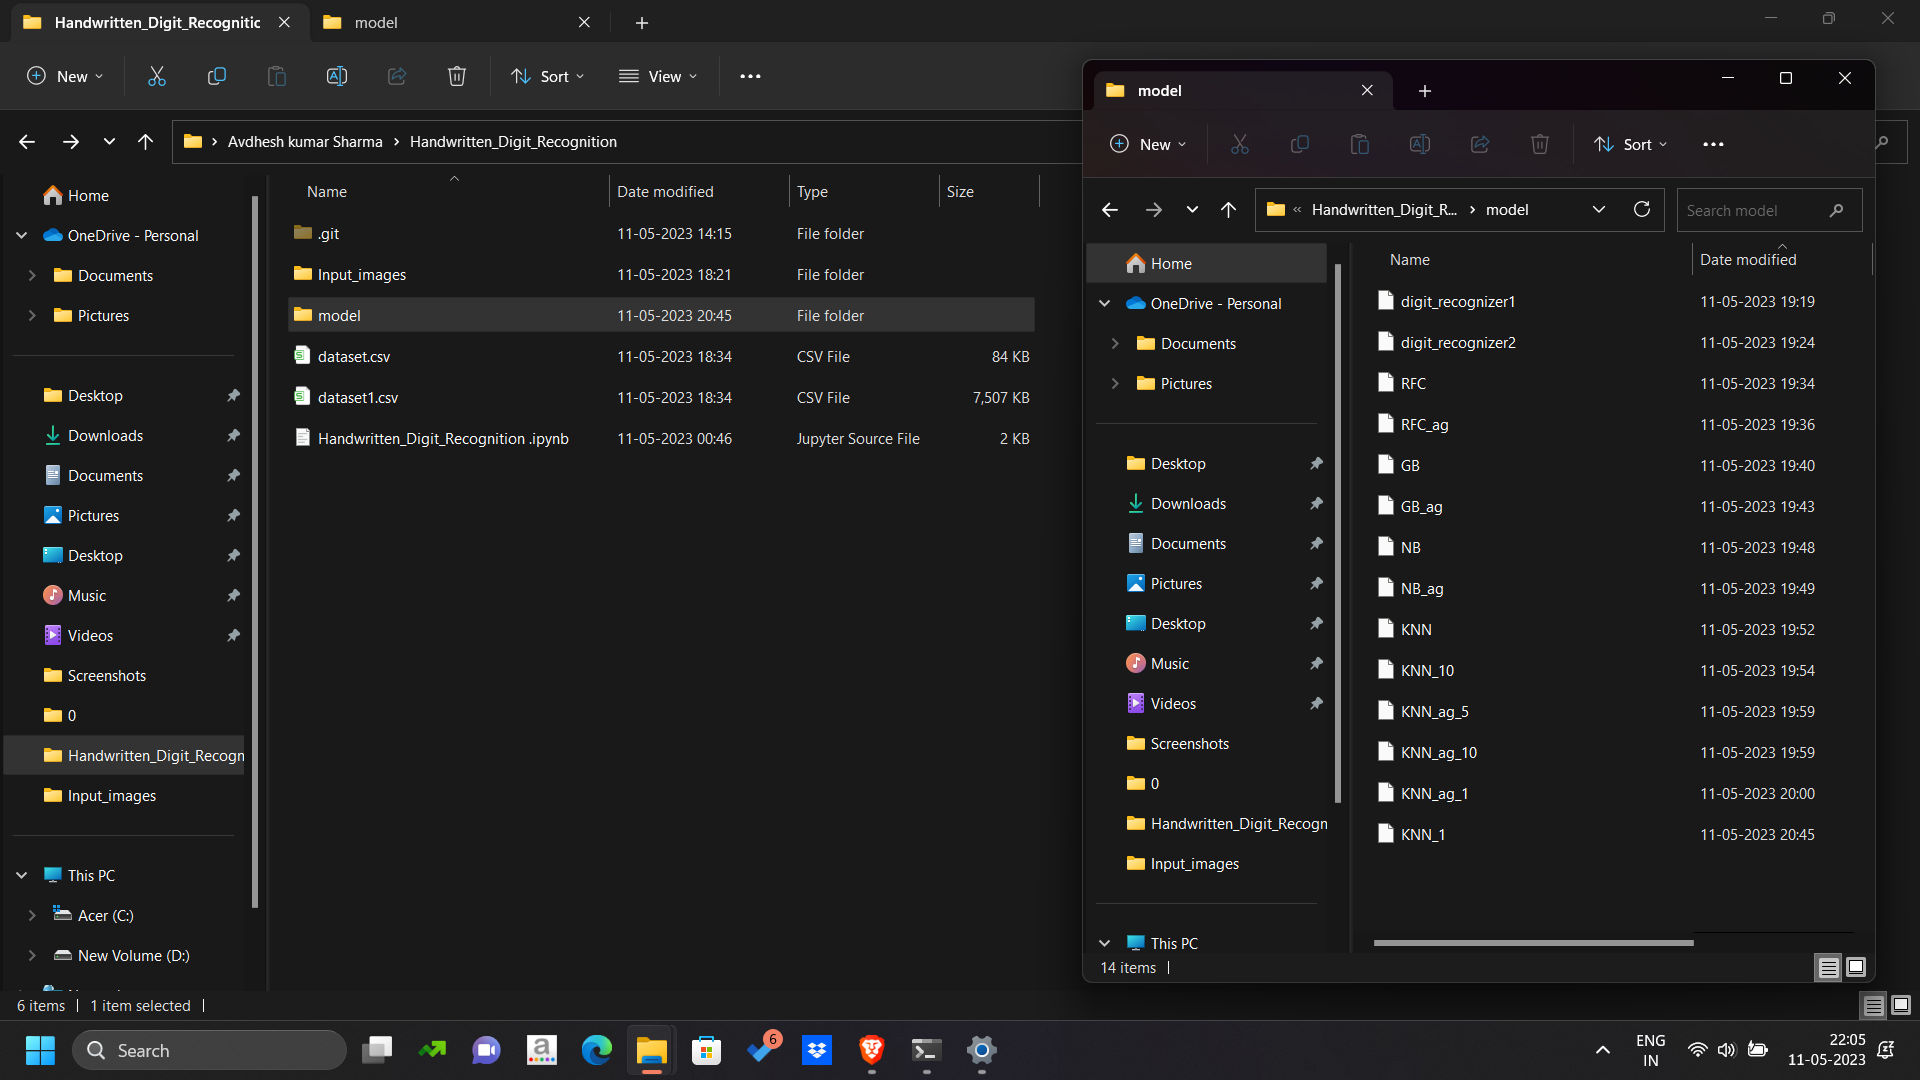

# Creation of the Table of the Accuracy and the actual Classifier names


In [72]:
from sklearn.metrics import accuracy_score
import joblib

# Separate classifier names and filenames
classifier_names = [
    "classifier1",
    "classifier2",
    "classifier3",
    "classifier4",
    "classifier5",
    "classifier6",
    "classifier7",
    "classifier8",
    "classifier9",
    "classifier12",
    "classifier10",
    "classifier13",
    "classifier11",
    "classifier14"
]

file_names = [
    "digit_recognizer1",
    "digit_recognizer2",
    "RFC",
    "RFC_ag",
    "GB",
    "GB_ag",
    "NB",
    "NB_ag",
    "KNN",
    "KNN_ag_5",
    "KNN_10",
    "KNN_ag_10",
    "KNN_1",
    "KNN_ag_1"
]

# Iterate over classifier names and filenames
for i in range(len(classifier_names)):
    classifier_name = classifier_names[i]
    file_name = file_names[i]

    # Specify the file path for the model
    model_path = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\model\{}".format(file_name)

    # Load the model from the file path
    classifier_model = joblib.load(model_path)

    # Select the appropriate dataset based on the index being odd or even
    if i % 2 == 0:
        test_x = test_x_original
        test_y = test_y_original
    else:
        test_x = test_x_ag
        test_y = test_y_ag

    # Make predictions on the test data
    predictions = classifier_model.predict(test_x)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(test_y, predictions)

    # Print the accuracy result
    print("Accuracy for {} model: {}".format(classifier_name, accuracy))


Accuracy for classifier1 model: 0.5
Accuracy for classifier2 model: 0.8232890704800817
Accuracy for classifier3 model: 0.5
Accuracy for classifier4 model: 0.95097037793667
Accuracy for classifier5 model: 0.4
Accuracy for classifier6 model: 0.8723186925434117
Accuracy for classifier7 model: 0.1
Accuracy for classifier8 model: 0.34831460674157305
Accuracy for classifier9 model: 0.3


C:\Users\Acer pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Acer pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

Accuracy for classifier12 model: 0.8937691521961185
Accuracy for classifier10 model: 0.3


C:\Users\Acer pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Acer pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

Accuracy for classifier13 model: 0.8406537282941777
Accuracy for classifier11 model: 0.5
Accuracy for classifier14 model: 0.947906026557712


## Removing Warnigs

In [73]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")


In [74]:
from sklearn.metrics import accuracy_score
import joblib

# Separate classifier names and filenames
classifier_names = [
    "classifier1",
    "classifier2",
    "classifier3",
    "classifier4",
    "classifier5",
    "classifier6",
    "classifier7",
    "classifier8",
    "classifier9",
    "classifier12",
    "classifier10",
    "classifier13",
    "classifier11",
    "classifier14"
]

file_names = [
    "digit_recognizer1",
    "digit_recognizer2",
    "RFC",
    "RFC_ag",
    "GB",
    "GB_ag",
    "NB",
    "NB_ag",
    "KNN",
    "KNN_ag_5",
    "KNN_10",
    "KNN_ag_10",
    "KNN_1",
    "KNN_ag_1"
]
Real_Classifier_Names = [
    "SVC_original",
    "SVC_augmentation",
    "RFC_original",
    "RFC_augmentation",
    "GradientBoosting_original",
    "GradientBoosting_augmentation",
    "NaiveBayes_original",
    "NaiveBayes_augmentation",
    "KNN_5_original",
    "KNN_5_augmentation",
    "KNN_10_original",
    "KNN_10_augmentation",
    "KNN_1_original",
    "KNN_1_augmentation"
]

# Iterate over classifier names and filenames
for i in range(len(classifier_names)):
    classifier_name = classifier_names[i]
    file_name = file_names[i]

    # Specify the file path for the model
    model_path = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\model\{}".format(file_name)

    # Load the model from the file path
    classifier_model = joblib.load(model_path)

    # Select the appropriate dataset based on the index being odd or even
    if i % 2 == 0:
        test_x = test_x_original
        test_y = test_y_original
    else:
        test_x = test_x_ag
        test_y = test_y_ag

    # Make predictions on the test data
    predictions = classifier_model.predict(test_x)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(test_y, predictions)

    # Print the accuracy result
    print("Accuracy for {} model: {}".format(classifier_name, accuracy))


Accuracy for classifier1 model: 0.5
Accuracy for classifier2 model: 0.8232890704800817
Accuracy for classifier3 model: 0.5
Accuracy for classifier4 model: 0.95097037793667
Accuracy for classifier5 model: 0.4
Accuracy for classifier6 model: 0.8723186925434117
Accuracy for classifier7 model: 0.1
Accuracy for classifier8 model: 0.34831460674157305
Accuracy for classifier9 model: 0.3
Accuracy for classifier12 model: 0.8937691521961185
Accuracy for classifier10 model: 0.3
Accuracy for classifier13 model: 0.8406537282941777
Accuracy for classifier11 model: 0.5
Accuracy for classifier14 model: 0.947906026557712


In [75]:
from tabulate import tabulate

# Create an empty list to store the accuracy results
accuracy_results = []

# Iterate over classifier names and filenames
for i in range(len(classifier_names)):
    classifier_name = classifier_names[i]
    file_name = file_names[i]

    # Specify the file path for the model
    model_path = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\model\{}".format(file_name)

    # Load the model from the file path
    classifier_model = joblib.load(model_path)

    # Select the appropriate dataset based on the index being odd or even
    if i % 2 == 0:
        test_x = test_x_original
        test_y = test_y_original
    else:
        test_x = test_x_ag
        test_y = test_y_ag

    # Make predictions on the test data
    predictions = classifier_model.predict(test_x)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(test_y, predictions)

    # Append the accuracy result to the list
    accuracy_results.append([Real_Classifier_Names[i], classifier_name, accuracy])

# Specify the table headers
headers = ["Real Classifier Name", "Classifier", "Accuracy"]

# Print the table
print(tabulate(accuracy_results, headers=headers, tablefmt="grid"))


+-------------------------------+--------------+------------+
| Real Classifier Name          | Classifier   |   Accuracy |
+===============================+==============+============+
| SVC_original                  | classifier1  |   0.5      |
+-------------------------------+--------------+------------+
| SVC_augmentation              | classifier2  |   0.823289 |
+-------------------------------+--------------+------------+
| RFC_original                  | classifier3  |   0.5      |
+-------------------------------+--------------+------------+
| RFC_augmentation              | classifier4  |   0.95097  |
+-------------------------------+--------------+------------+
| GradientBoosting_original     | classifier5  |   0.4      |
+-------------------------------+--------------+------------+
| GradientBoosting_augmentation | classifier6  |   0.872319 |
+-------------------------------+--------------+------------+
| NaiveBayes_original           | classifier7  |   0.1      |
+-------

### From the provided table, the best classifier for the original dataset is "KNN_1_original" with an accuracy of 0.6.

### For the augmented dataset, the best classifier is "KNN_1_augmentation" with an accuracy of 0.932584.

### While the KNN_10_original is overfitting so that's why i didn't choose this classifier


# Prediction of Image Drawn Directly in the Paint

In [95]:
model=joblib.load(r"C:\Users\Acer pc\Handwritten_Digit_Recognition\model\KNN_ag_1")
images_folder=r"C:\Users\Acer pc\Handwritten_Digit_Recognition\img"
screen_width, screen_height = ImageGrab.grab().size
while True:
    img=ImageGrab.grab(bbox=(200,300,(screen_width//2)-200, screen_height-200))
    img.save(images_folder+"img.png")
    im = cv2.imread(images_folder+"img.png")
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
   
   #Threshold the image
    ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
   
    rows,cols=roi.shape
   
    X = []
   
   ## Add pixel one by one into data array
    for i in range(rows):
        for j in range(cols):
            k = roi[i,j]
            if k>100:
                k=1
            else:
                k=0
            X.append(k)
           
    predictions  =model.predict([X])
    print("Prediction:",predictions[0])
    cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
   
    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result",im)
    cv2.waitKey(5000)
    if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
        break
cv2.destroyAllWindows()

Prediction: 3
Prediction: 3
Prediction: 3
Prediction: 4
Prediction: 1
Prediction: 9
Prediction: 7
Prediction: 6
Prediction: 7
Prediction: 2
Prediction: 6
Prediction: 2
Prediction: 2
Prediction: 3
Prediction: 8
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 5
Prediction: 6
Prediction: 3
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1


# Making a Deep Learning Model

In [77]:
# importing libraries for deep learning
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
import numpy as np
import pandas as pd


In [78]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ag, Y_ag, test_size=0.2, random_state=42)

In [79]:
# Shapes of all the splits of Augmentation dataset in Deep Learning
print("Train size of X:",X_train.shape)
print("Test size of X:",X_test.shape)
print("Train size of Y:",y_train.shape)
print("Test size of X:",y_test.shape)

Train size of X: (3912, 784)
Test size of X: (979, 784)
Train size of Y: (3912,)
Test size of X: (979,)


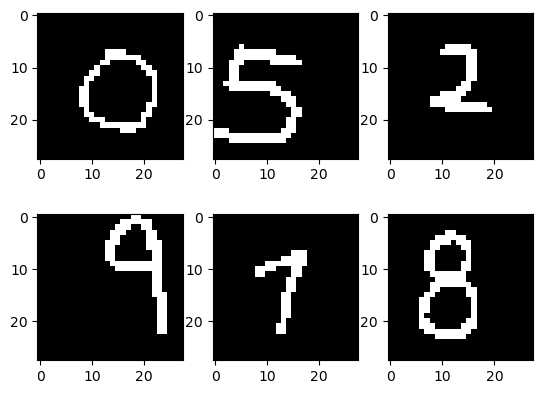

In [80]:
import matplotlib.pyplot as plt

for i in range(6):
    pixels = X_train.iloc[i]["pixel_0":"pixel_783"].values
    image = pixels.reshape(28, 28)  # Assuming each image has a size of 28x28
    plt.subplot(2, 3, i + 1)
    plt.imshow(image, cmap="gray")
    plt.axis("on")

plt.show()


# Data Preprocess and Normalization 

In [81]:
import numpy as np

# Convert X_train and X_test DataFrames to NumPy arrays
X_train = X_train.values
X_test = X_test.values

# Reshape the arrays
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32')


In [82]:
from keras.utils import to_categorical

# Converts a class vector (integers) to binary class matrix
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [83]:
# Shapes of new array after reshaping
print("Train size of X:",X_train.shape)
print("Test size of X:",X_test.shape)
print("Train size of Y:",y_train.shape)
print("Test size of X:",y_test.shape)

Train size of X: (3912, 28, 28, 1)
Test size of X: (979, 28, 28, 1)
Train size of Y: (3912, 10)
Test size of X: (979, 10)


In [84]:
# Normalization inputs
X_train = X_train/255
X_test =X_test/255

# Creation of the Model of CNN

In [85]:
import tensorflow as tf

IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
IMAGE_CHANNELS = 1

# Define the model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

In [86]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
40/40 [==============================] - 2s 26ms/step - loss: 2.2976 - accuracy: 0.1613 - val_loss: 2.2858 - val_accuracy: 0.1369
Epoch 2/10
40/40 [==============================] - 1s 20ms/step - loss: 2.2221 - accuracy: 0.2403 - val_loss: 2.0750 - val_accuracy: 0.4086
Epoch 3/10
40/40 [==============================] - 1s 22ms/step - loss: 1.8188 - accuracy: 0.4586 - val_loss: 1.5113 - val_accuracy: 0.5434
Epoch 4/10
40/40 [==============================] - 1s 20ms/step - loss: 1.4064 - accuracy: 0.5337 - val_loss: 1.2310 - val_accuracy: 0.5843
Epoch 5/10
40/40 [==============================] - 1s 22ms/step - loss: 1.1795 - accuracy: 0.5913 - val_loss: 1.0601 - val_accuracy: 0.6364
Epoch 6/10
40/40 [==============================] - 1s 19ms/step - loss: 1.0571 - accuracy: 0.6270 - val_loss: 0.9899 - val_accuracy: 0.6547
Epoch 7/10
40/40 [==============================] - 1s 20ms/step - loss: 0.9783 - accuracy: 0.6506 - val_loss: 0.8744 - val_accuracy: 0.6864
Epoch 8/10
40

In [87]:
from sklearn.metrics import precision_score, recall_score

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)



31/31 [==============================] - 0s 5ms/step - loss: 0.7229 - accuracy: 0.7314
Test Loss: 0.7228931784629822
Test Accuracy: 0.731358528137207


In [88]:

# Save the model without an extension
model_path = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\model\CNN_10epoch"
joblib.dump(model, model_path)



Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-05-12 19:52:06         3848
metadata.json                                  2023-05-12 19:52:06         

['C:\\Users\\Acer pc\\Handwritten_Digit_Recognition\\model\\CNN_10epoch']

In [89]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=25, validation_data=(X_test, y_test))


Epoch 1/25
392/392 [==============================] - 3s 6ms/step - loss: 0.7553 - accuracy: 0.7247 - val_loss: 0.6376 - val_accuracy: 0.7661
Epoch 2/25
392/392 [==============================] - 2s 6ms/step - loss: 0.6695 - accuracy: 0.7500 - val_loss: 0.5539 - val_accuracy: 0.8039
Epoch 3/25
392/392 [==============================] - 2s 6ms/step - loss: 0.5826 - accuracy: 0.7935 - val_loss: 0.5319 - val_accuracy: 0.7998
Epoch 4/25
392/392 [==============================] - 2s 6ms/step - loss: 0.5280 - accuracy: 0.8096 - val_loss: 0.4809 - val_accuracy: 0.8192
Epoch 5/25
392/392 [==============================] - 2s 5ms/step - loss: 0.4753 - accuracy: 0.8272 - val_loss: 0.3998 - val_accuracy: 0.8611
Epoch 6/25
392/392 [==============================] - 2s 5ms/step - loss: 0.4247 - accuracy: 0.8464 - val_loss: 0.3488 - val_accuracy: 0.8846
Epoch 7/25
392/392 [==============================] - 2s 5ms/step - loss: 0.3866 - accuracy: 0.8609 - val_loss: 0.3152 - val_accuracy: 0.8825
Epoch 

In [90]:
from sklearn.metrics import precision_score, recall_score

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)



31/31 [==============================] - 0s 5ms/step - loss: 0.1311 - accuracy: 0.9469
Test Loss: 0.13105949759483337
Test Accuracy: 0.9468845725059509


In [91]:

# Save the model without an extension
model_path = r"C:\Users\Acer pc\Handwritten_Digit_Recognition\model\CNN_25epoch"
joblib.dump(model, model_path)



Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-05-12 19:53:05         3848
metadata.json                                  2023-05-12 19:53:05         

['C:\\Users\\Acer pc\\Handwritten_Digit_Recognition\\model\\CNN_25epoch']